<a href="https://colab.research.google.com/github/Negro2305/Aprendizaje-de-M-quina/blob/main/Proyecto3_Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
1 Company- String -Laptop Manufacturer
2 Product -String -Brand and Model
3 TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
4 Inches -Numeric- Screen Size
5 ScreenResolution -String- Screen Resolution
6 Cpu- String -Central Processing Unit (CPU)
7 Ram -String- Laptop RAM
8 Memory -String- Hard Disk / SSD Memory
9 GPU -String- Graphics Processing Units (GPU)
10 OpSys -String- Operating System
11 Weight -String- Laptop Weight
```


In [113]:
import pandas as pd

import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt

## Para el Análisis de PCA
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Divide los datos en train y  test
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# metrica para calcular las predicciones
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler



# random forest, en produccion no es muy optimo
from sklearn.ensemble import RandomForestRegressor


In [34]:
data_frame = pd.read_csv('laptop_price.csv',encoding='ISO-8859-1')

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [35]:
# Elimino algunos Strings en cada uno de los registros para obtener datos enteros

data_frame['Ram']
data_frame['Ram'] = data_frame['Ram'].apply(lambda x: int(x.replace('GB','')))
#df['age']=df.apply(lambda x: x['age']+3,axis=1)
data_frame['Ram']
data_frame['Weight'] = data_frame['Weight'].apply(lambda x: float(x.replace('kg','')))

In [36]:
data_frame['Ram']



0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int64

In [37]:
data_frame['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

In [40]:
# Datos que voy a quitar 
# laptop_id : no lo necesito ya que es un auto incrementable
# product : es el nombre del producto, cada nombre es diferente y un nombre no influye en el precio
# 
#data_aux = data_frame.drop(['laptop_ID','Product','Company','TypeName','ScreenResolution'],axis=1)
data_aux = data_frame.drop(['laptop_ID','Product'],axis=1)
#data_aux = data_frame.drop(['laptop_ID','Product','Weight','Cpu','Gpu','Company','TypeName','ScreenResolution'],axis=1)

#data_aux = data_frame.drop(['Product','Weight'],axis=1)
data_final = pd.get_dummies(data_aux)
data_final.info()

data_final.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 345 entries, Inches to OpSys_macOS
dtypes: float64(3), int64(1), uint8(341)
memory usage: 474.8 KB


,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1366x768,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,...,Gpu_Nvidia GeForce GTX 1060,Gpu_Nvidia GeForce GTX 1070,Gpu_Nvidia GeForce GTX 1070M,Gpu_Nvidia GeForce GTX 1080,Gpu_Nvidia GeForce GTX 930MX,Gpu_Nvidia GeForce GTX 940M,Gpu_Nvidia GeForce GTX 940MX,Gpu_Nvidia GeForce GTX 950M,Gpu_Nvidia GeForce GTX 960,Gpu_Nvidia GeForce GTX 960<U+039C>,Gpu_Nvidia GeForce GTX 960M,Gpu_Nvidia GeForce GTX 965M,Gpu_Nvidia GeForce GTX 970M,Gpu_Nvidia GeForce GTX 980,Gpu_Nvidia GeForce GTX 980M,Gpu_Nvidia GeForce GTX1050 Ti,Gpu_Nvidia GeForce GTX1060,Gpu_Nvidia GeForce GTX1080,Gpu_Nvidia GeForce MX130,Gpu_Nvidia GeForce MX150,Gpu_Nvidia Quadro 3000M,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,13.3,8,1.34,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,15.6,8,1.86,575.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,15.4,16,1.83,2537.45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,13.3,8,1.37,1803.60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
data_final.tail()

,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1366x768,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,...,Gpu_Nvidia GeForce GTX 1060,Gpu_Nvidia GeForce GTX 1070,Gpu_Nvidia GeForce GTX 1070M,Gpu_Nvidia GeForce GTX 1080,Gpu_Nvidia GeForce GTX 930MX,Gpu_Nvidia GeForce GTX 940M,Gpu_Nvidia GeForce GTX 940MX,Gpu_Nvidia GeForce GTX 950M,Gpu_Nvidia GeForce GTX 960,Gpu_Nvidia GeForce GTX 960<U+039C>,Gpu_Nvidia GeForce GTX 960M,Gpu_Nvidia GeForce GTX 965M,Gpu_Nvidia GeForce GTX 970M,Gpu_Nvidia GeForce GTX 980,Gpu_Nvidia GeForce GTX 980M,Gpu_Nvidia GeForce GTX1050 Ti,Gpu_Nvidia GeForce GTX1060,Gpu_Nvidia GeForce GTX1080,Gpu_Nvidia GeForce MX130,Gpu_Nvidia GeForce MX150,Gpu_Nvidia Quadro 3000M,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
1298,14.0,4,1.80,638.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1299,13.3,16,1.30,1499.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1300,14.0,2,1.50,229.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1301,15.6,6,2.19,764.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1302,15.6,4,2.20,369.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
# Analizar los valores , en especial los de la media y varianza 
data_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
Ram,1303.0,8.382195,5.084665,2.00,4.0,8.00,8.00,64.0
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
Price_euros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0
Company_Acer,1303.0,0.079048,0.269918,0.00,0.0,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...
OpSys_No OS,1303.0,0.050652,0.219371,0.00,0.0,0.00,0.00,1.0
OpSys_Windows 10,1303.0,0.822717,0.382055,0.00,1.0,1.00,1.00,1.0
OpSys_Windows 10 S,1303.0,0.006140,0.078145,0.00,0.0,0.00,0.00,1.0
OpSys_Windows 7,1303.0,0.034536,0.182671,0.00,0.0,0.00,0.00,1.0


In [43]:
data_final.shape

(1303, 345)

In [44]:
data_final.isnull().sum()

Inches                0
Ram                   0
Weight                0
Price_euros           0
Company_Acer          0
                     ..
OpSys_No OS           0
OpSys_Windows 10      0
OpSys_Windows 10 S    0
OpSys_Windows 7       0
OpSys_macOS           0
Length: 345, dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


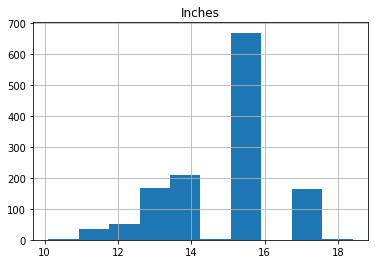

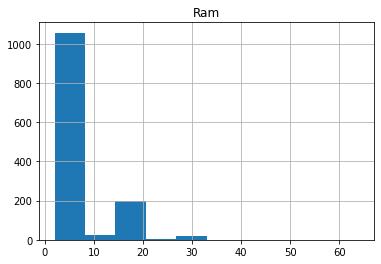

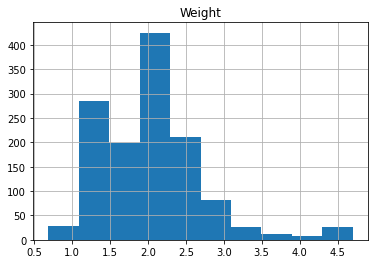

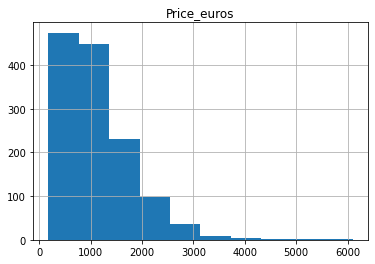

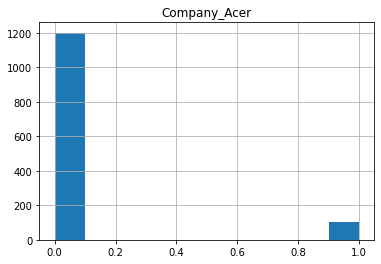

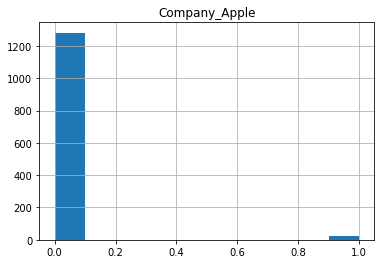

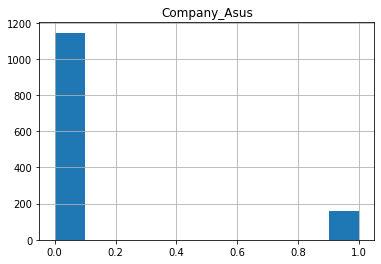

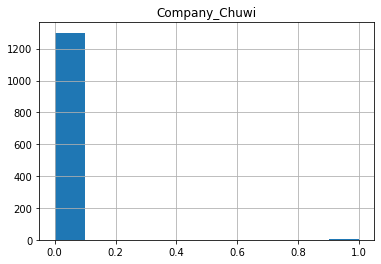

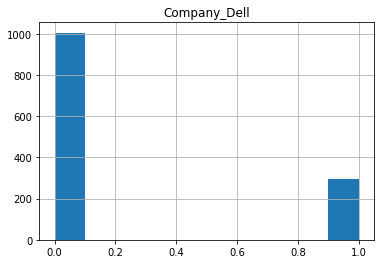

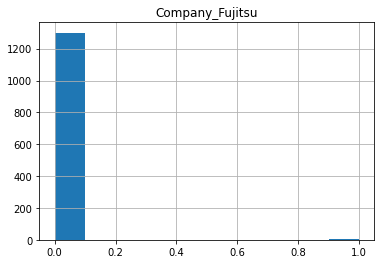

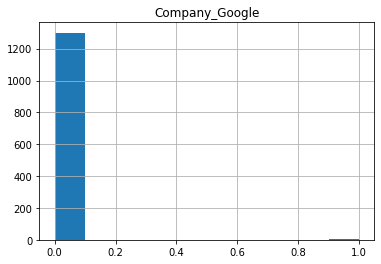

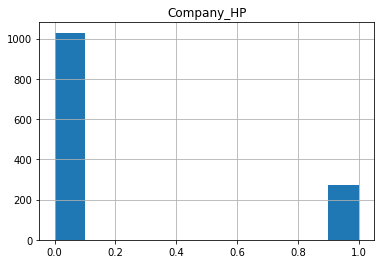

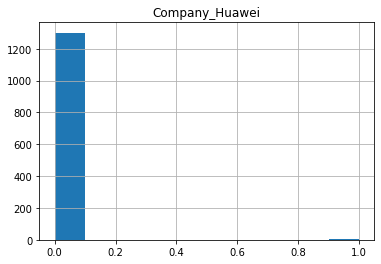

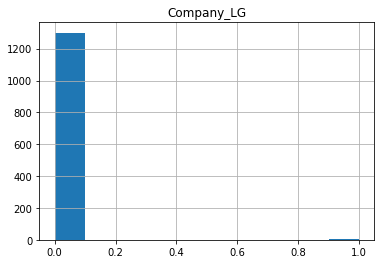

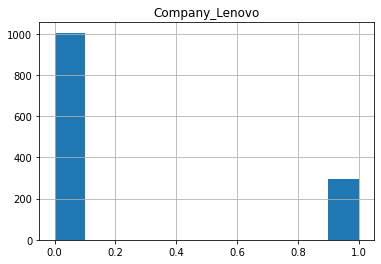

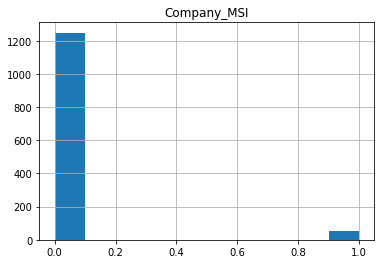

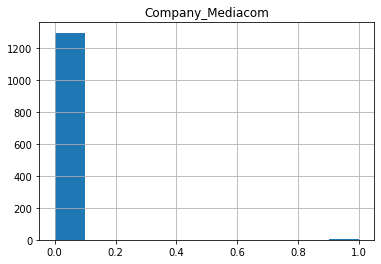

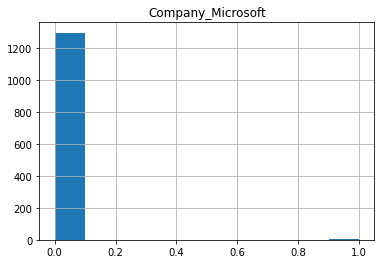

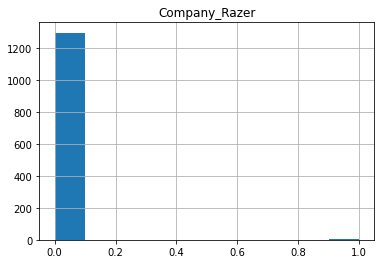

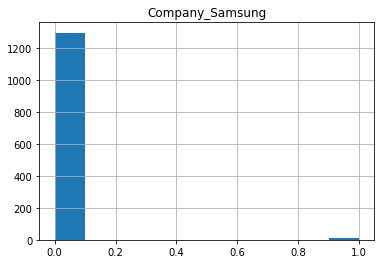

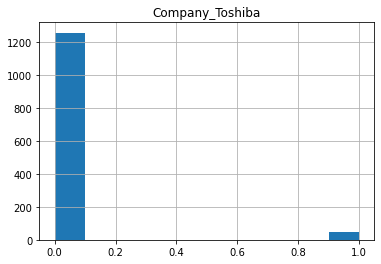

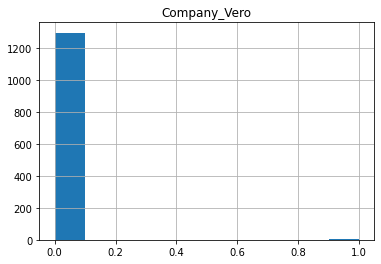

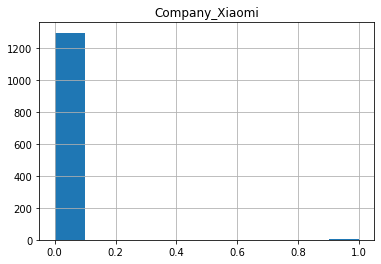

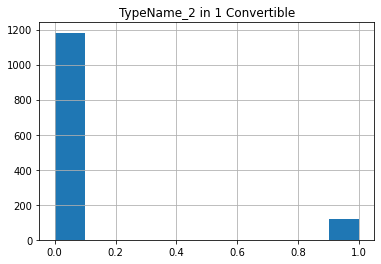

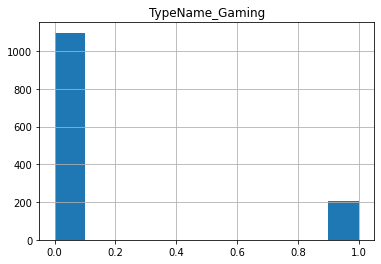

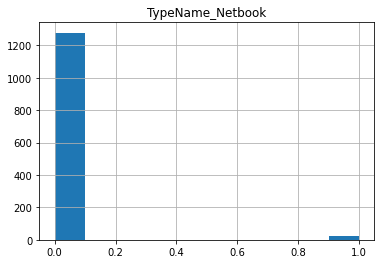

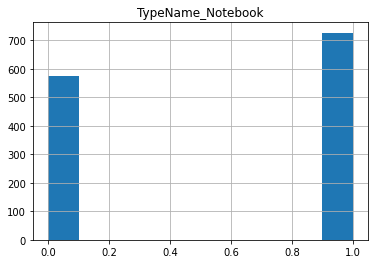

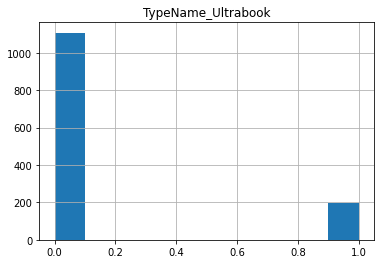

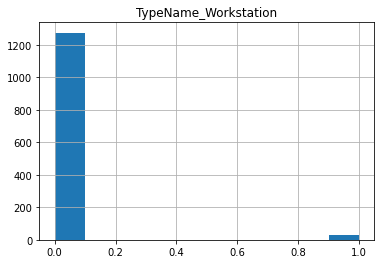

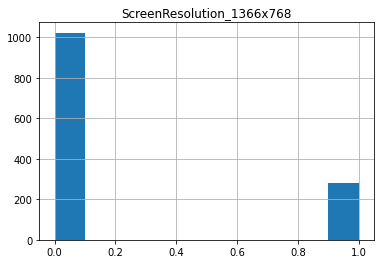

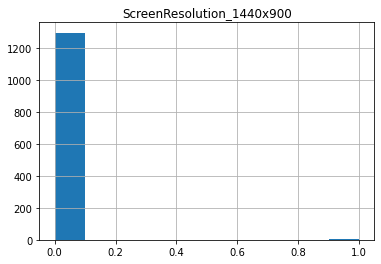

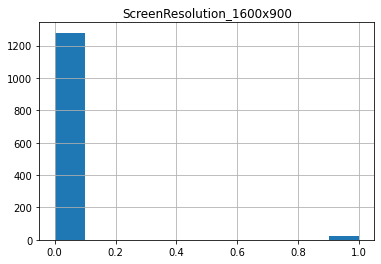

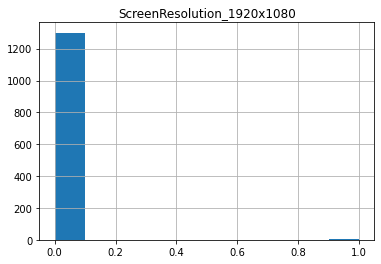

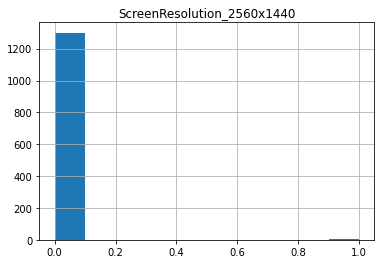

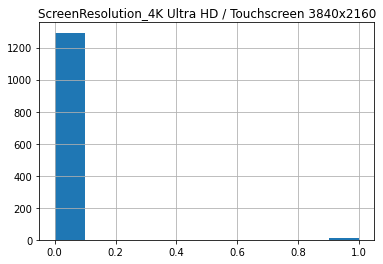

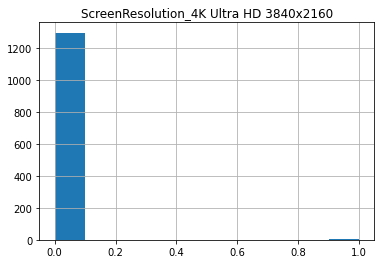

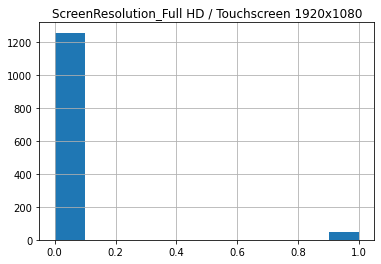

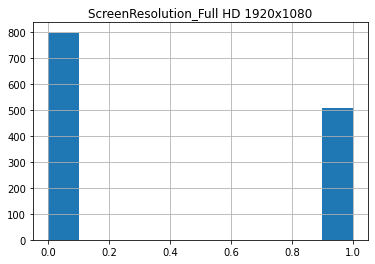

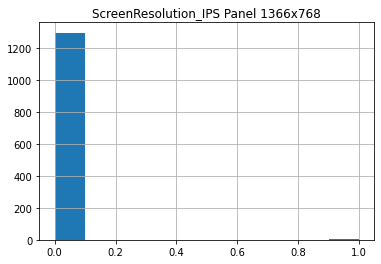

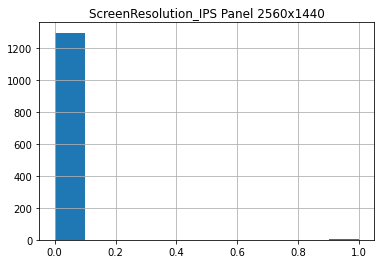

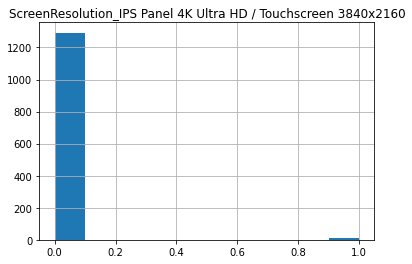

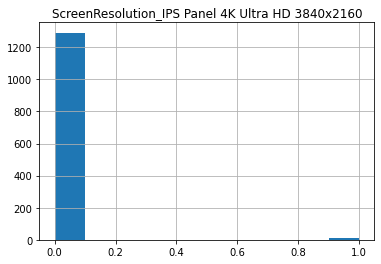

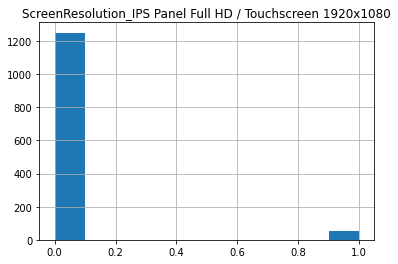

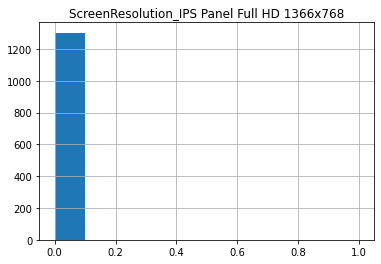

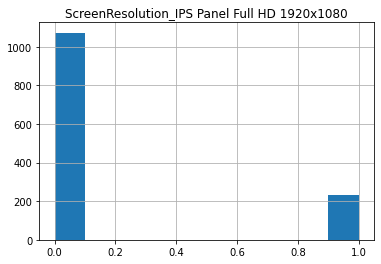

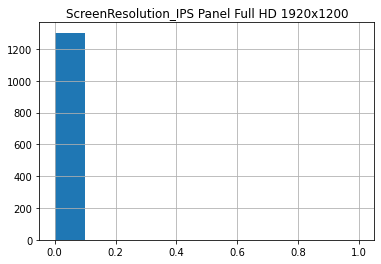

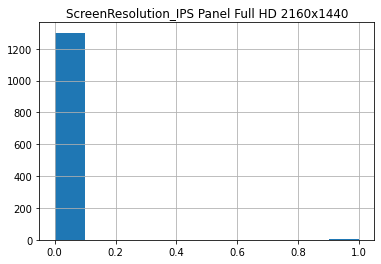

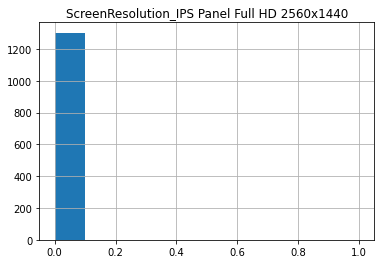

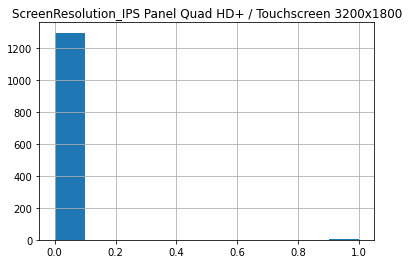

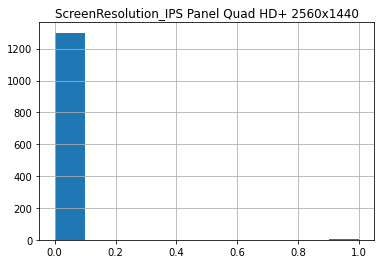

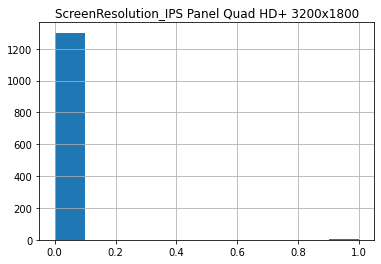

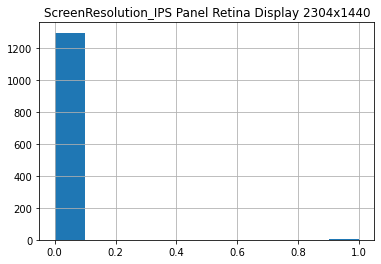

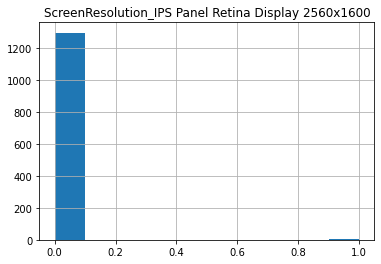

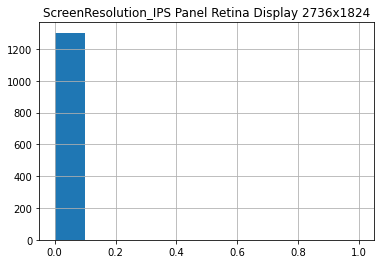

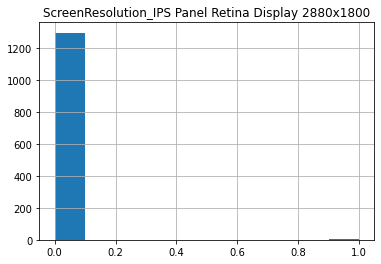

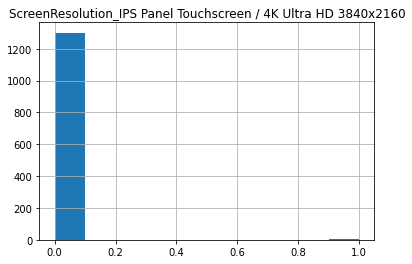

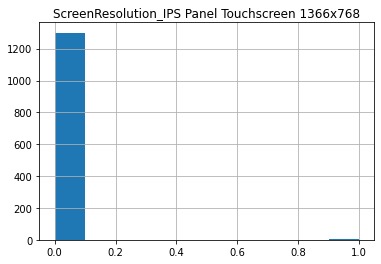

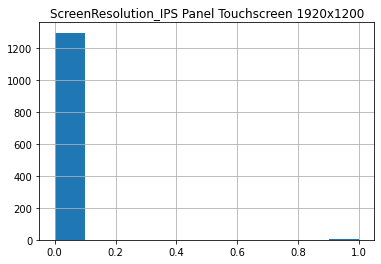

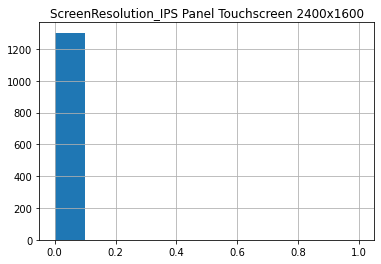

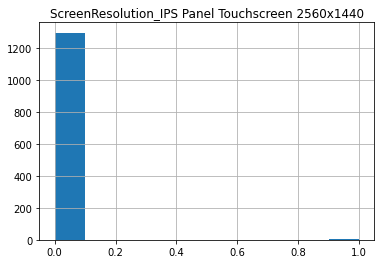

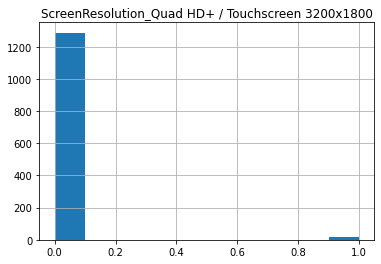

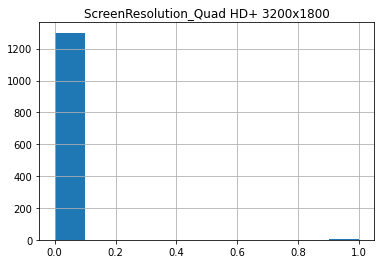

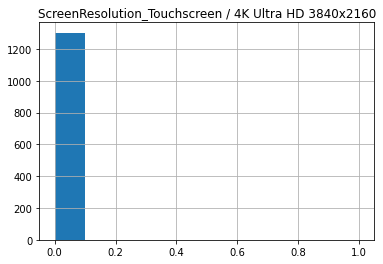

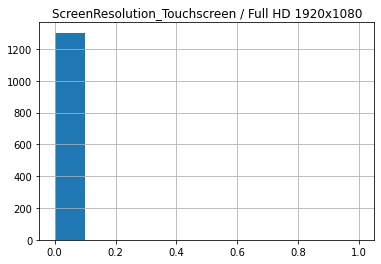

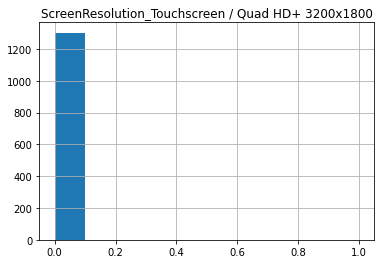

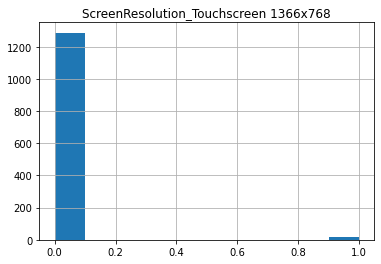

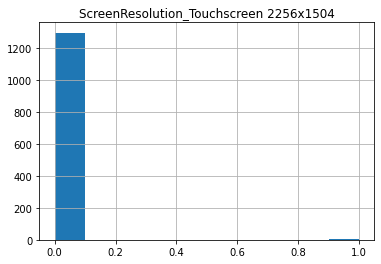

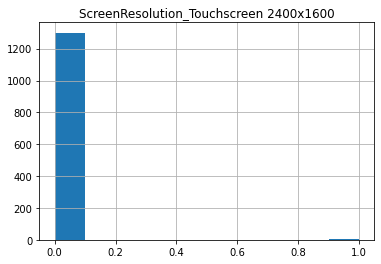

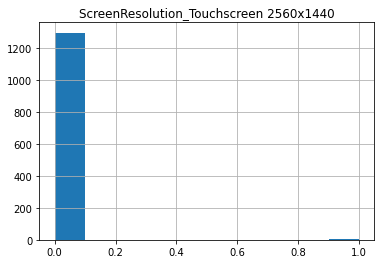

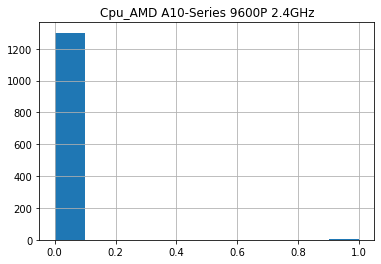

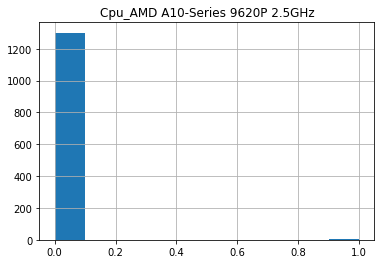

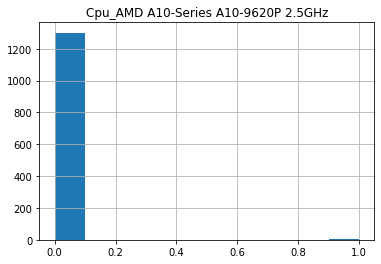

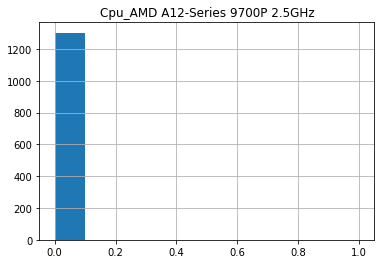

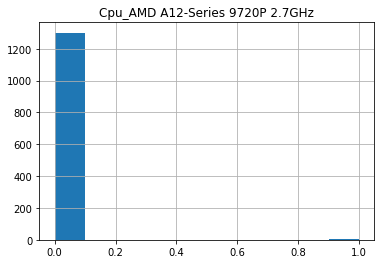

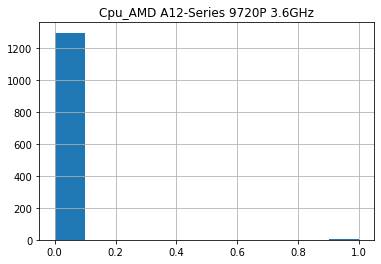

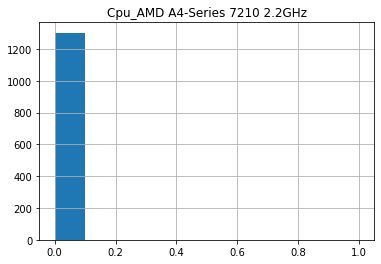

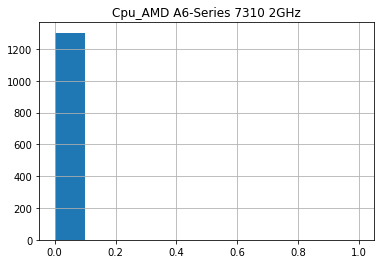

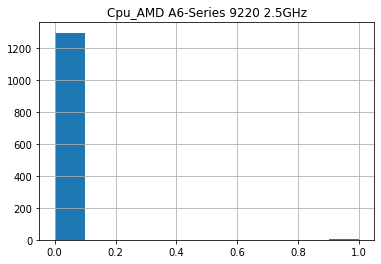

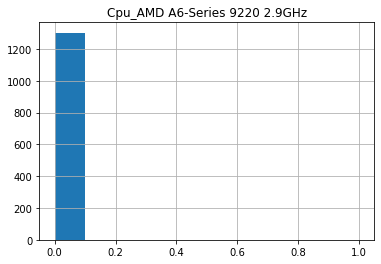

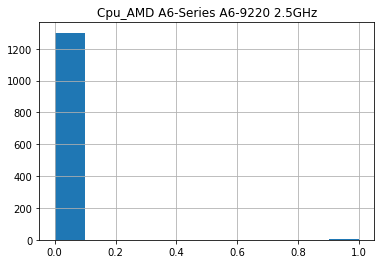

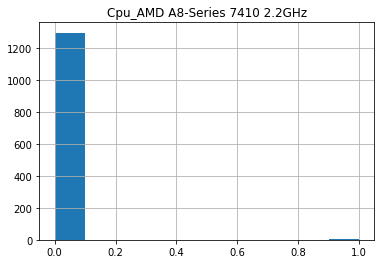

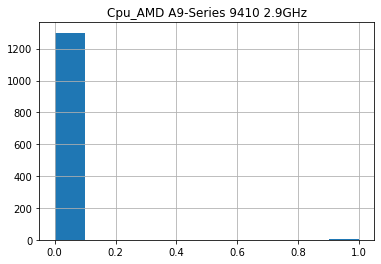

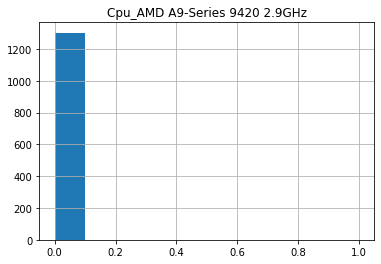

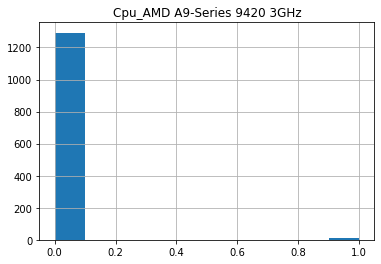

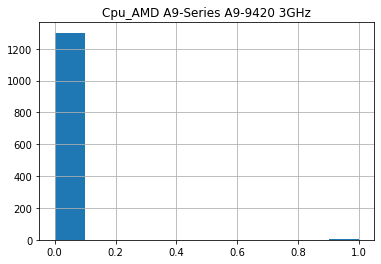

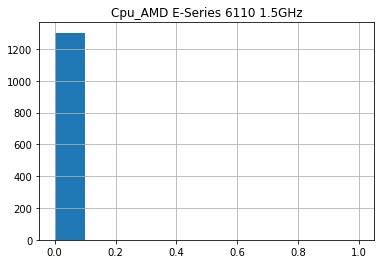

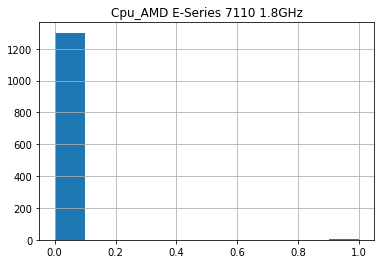

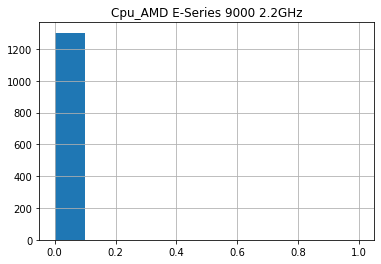

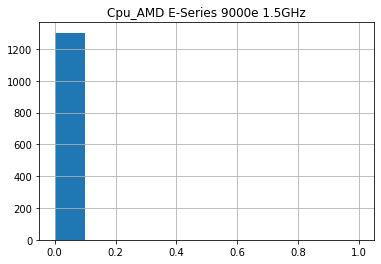

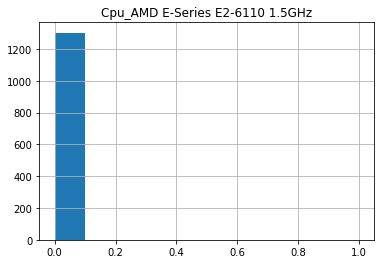

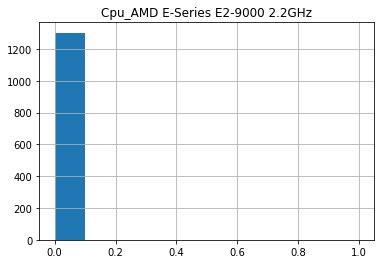

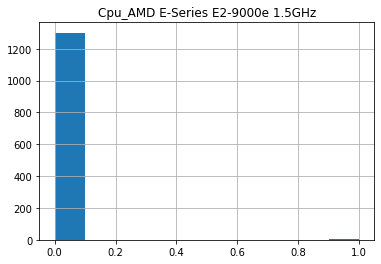

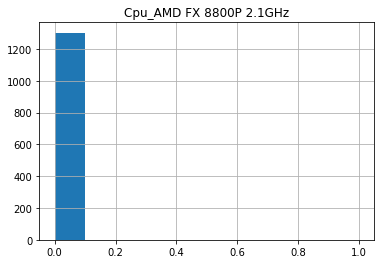

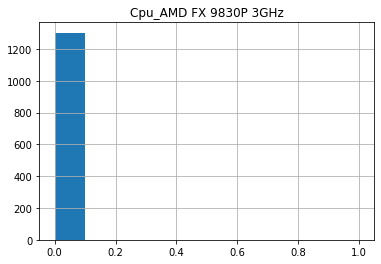

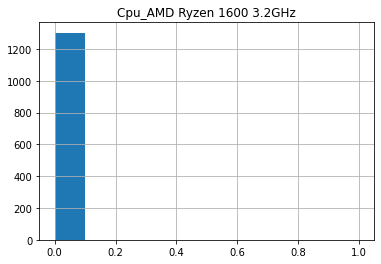

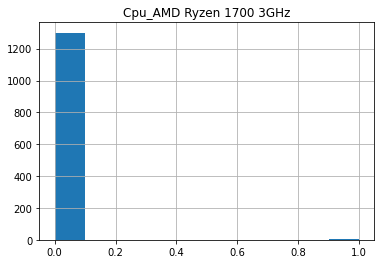

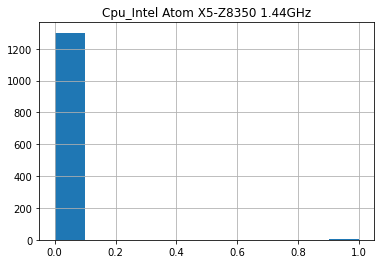

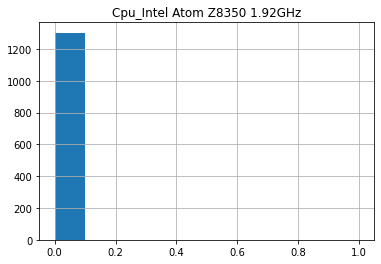

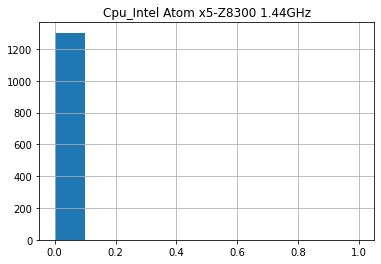

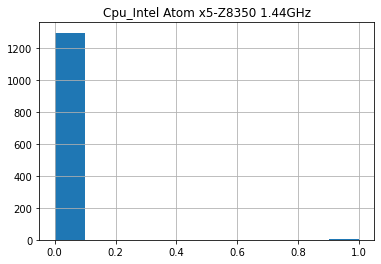

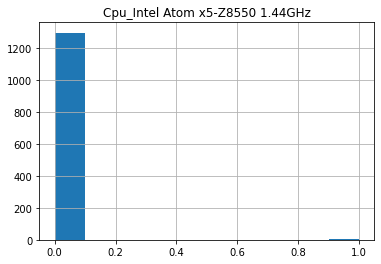

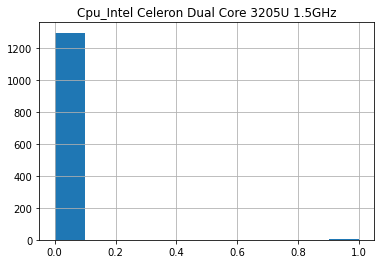

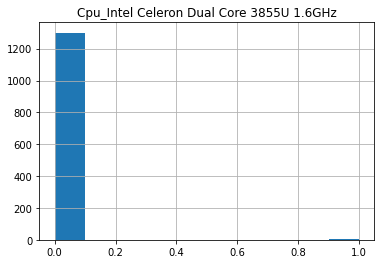

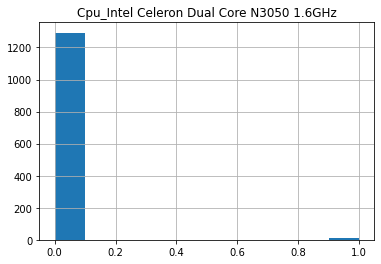

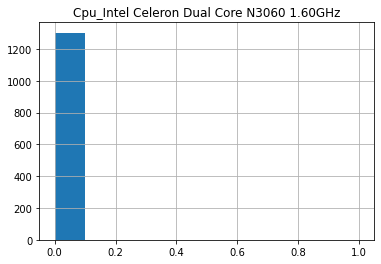

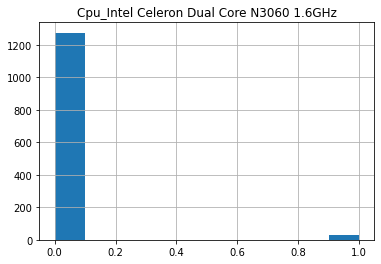

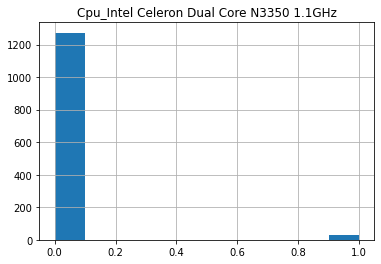

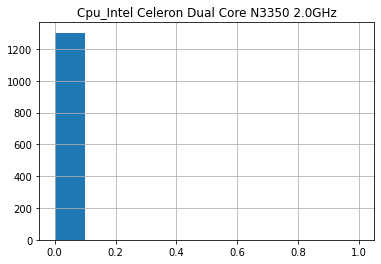

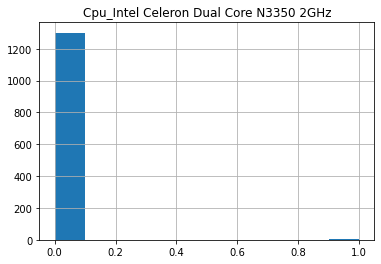

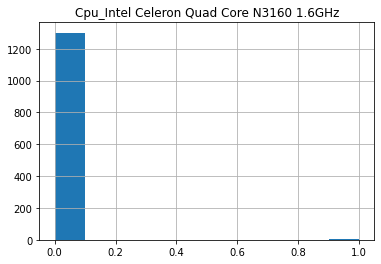

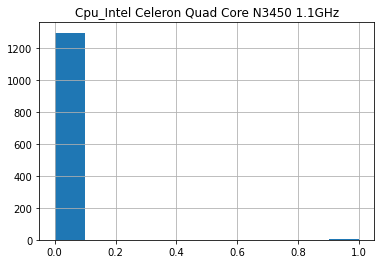

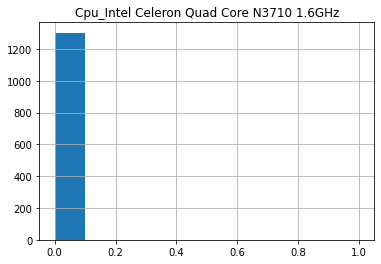

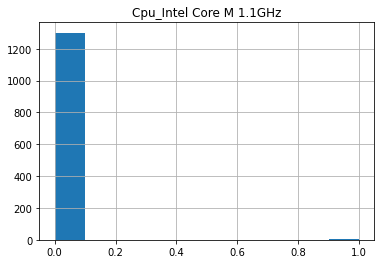

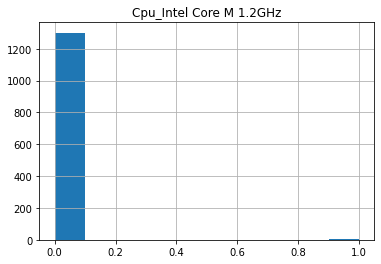

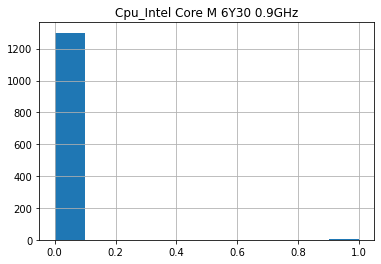

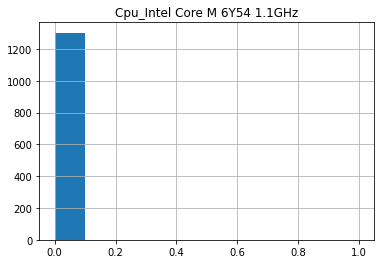

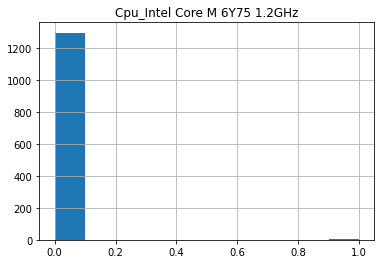

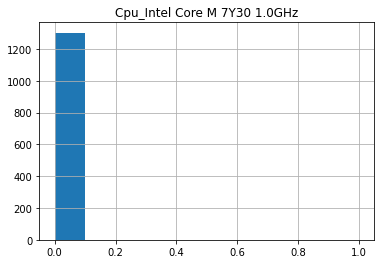

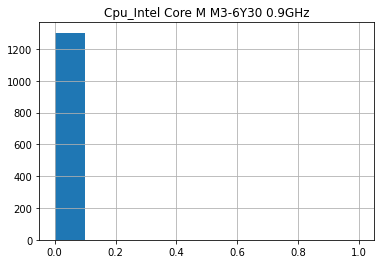

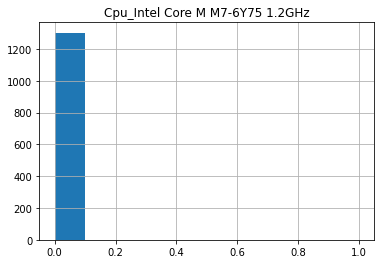

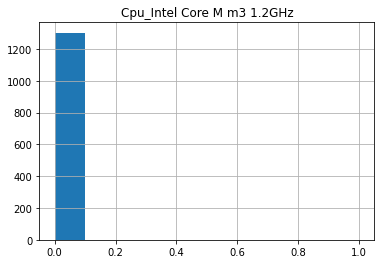

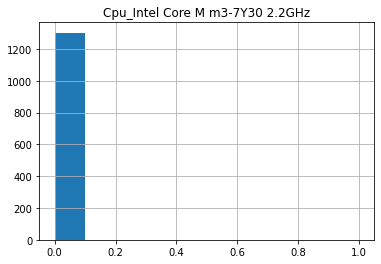

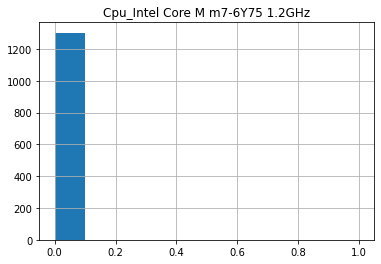

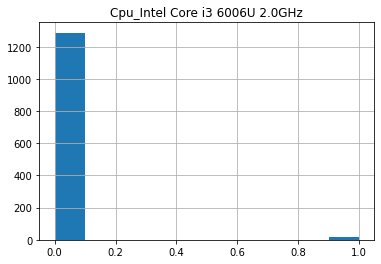

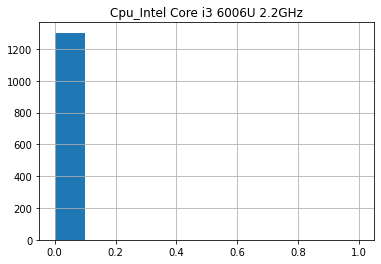

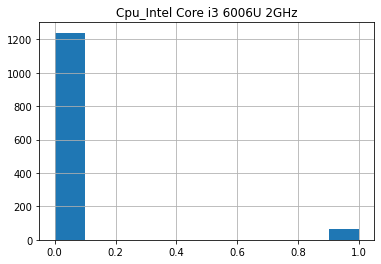

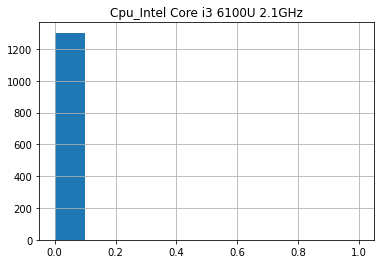

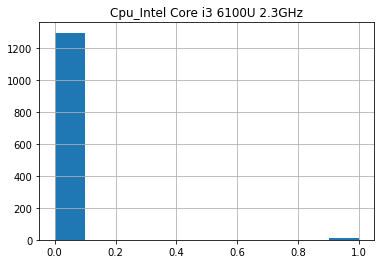

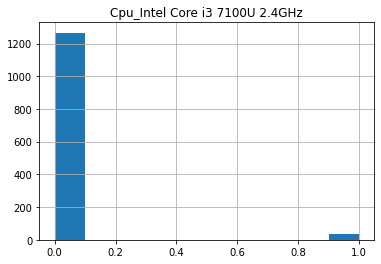

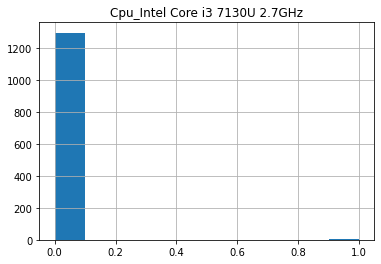

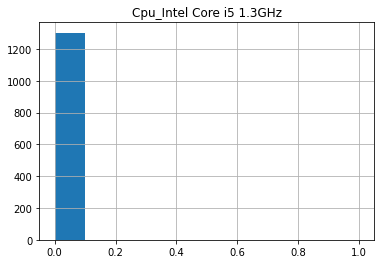

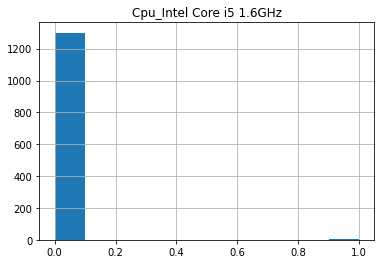

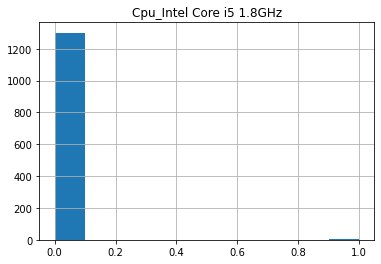

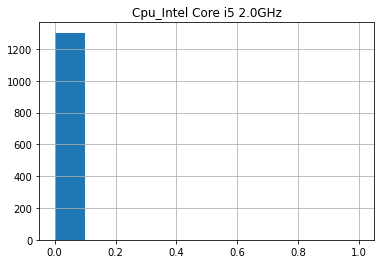

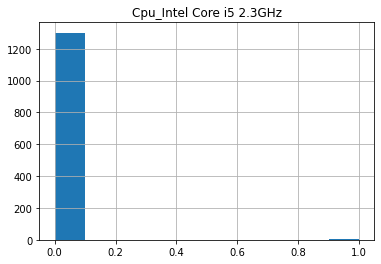

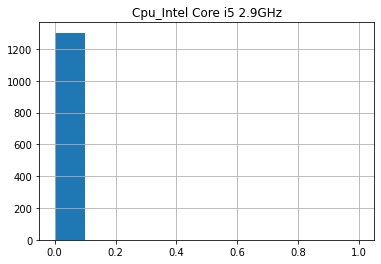

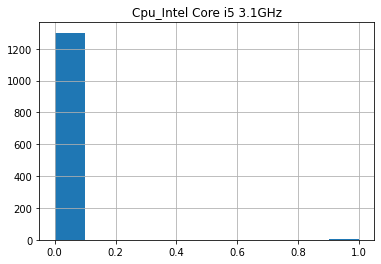

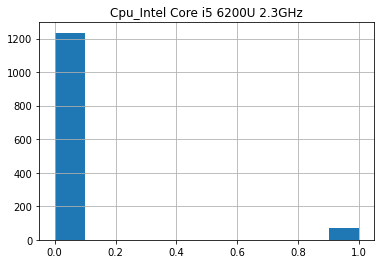

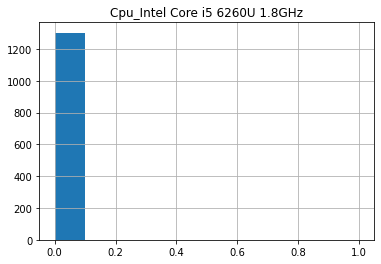

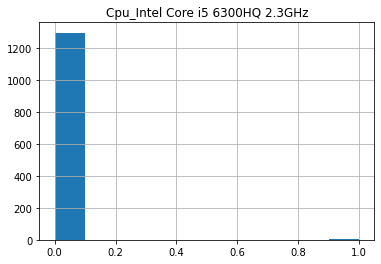

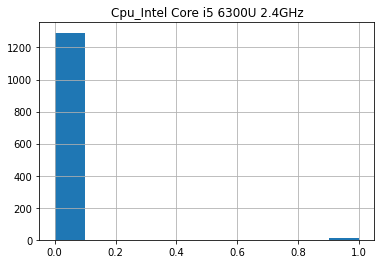

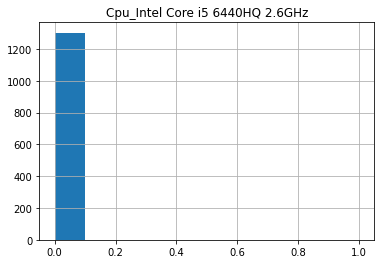

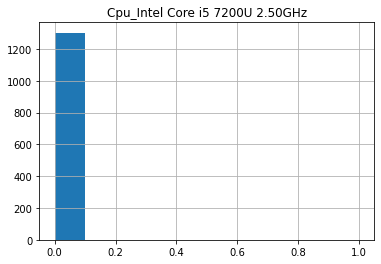

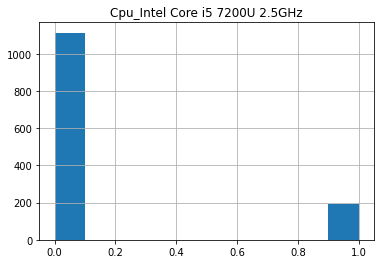

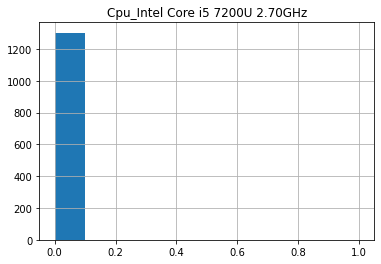

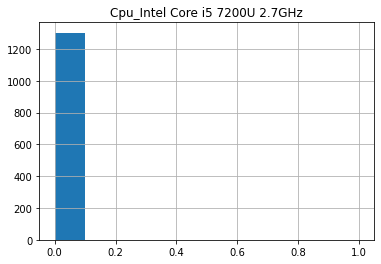

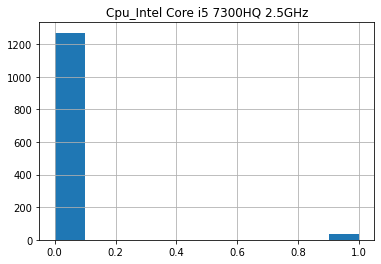

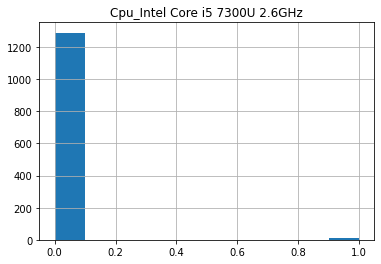

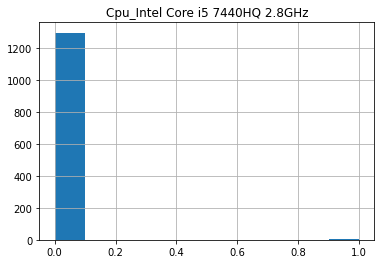

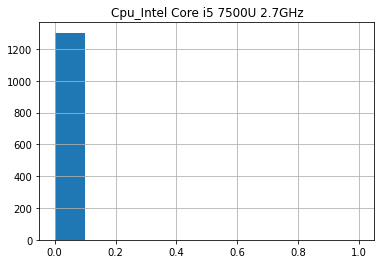

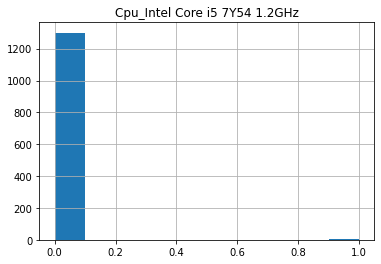

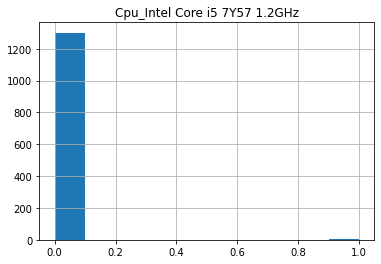

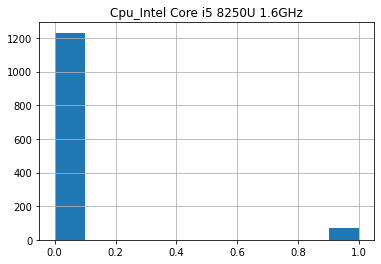

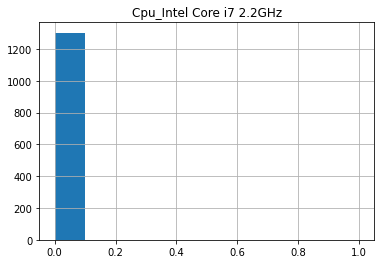

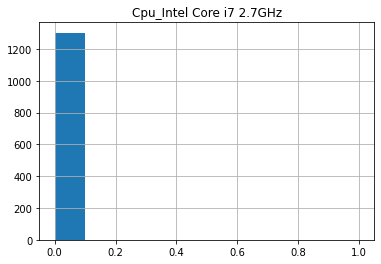

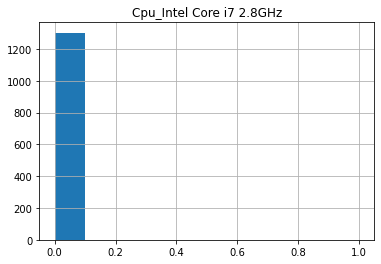

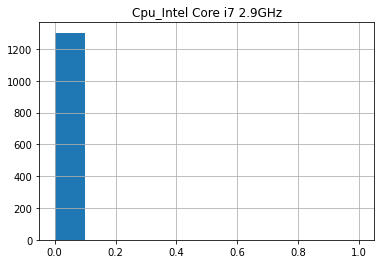

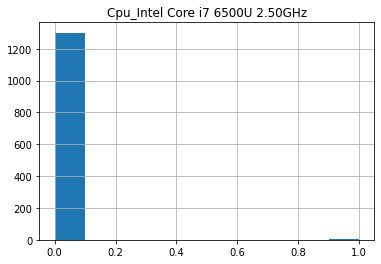

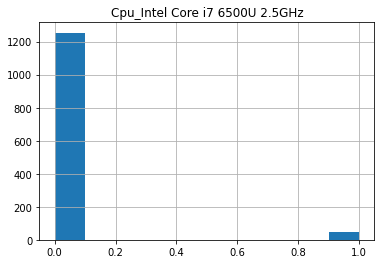

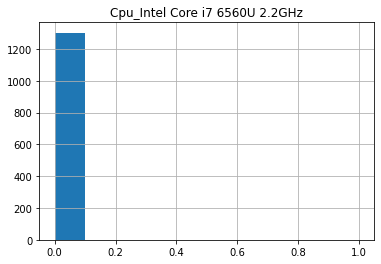

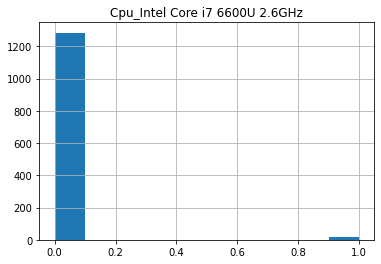

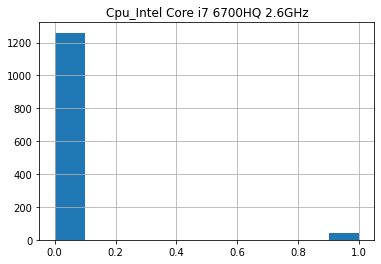

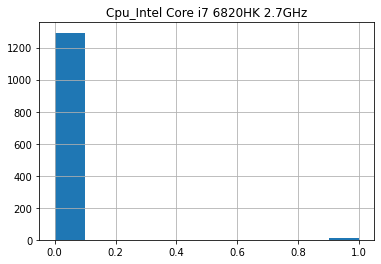

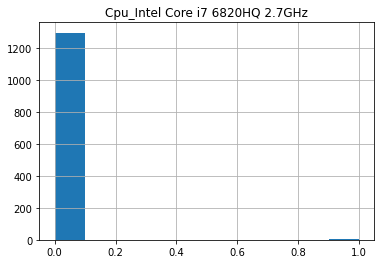

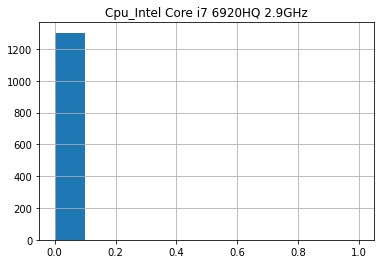

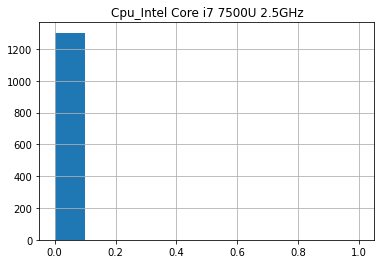

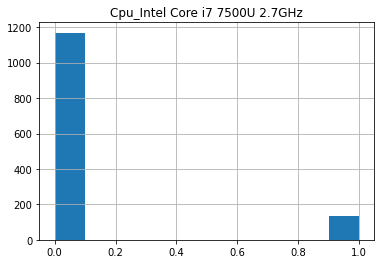

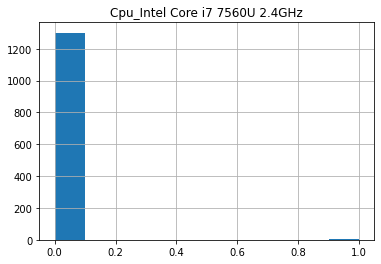

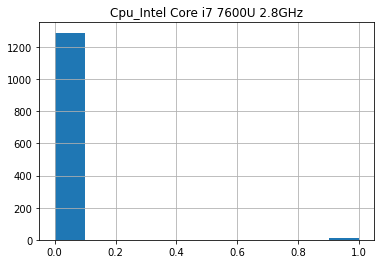

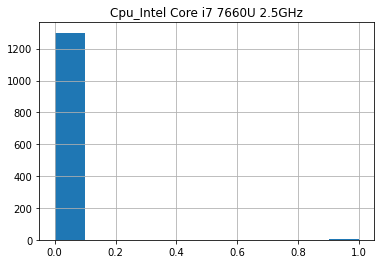

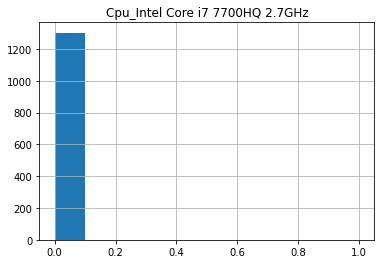

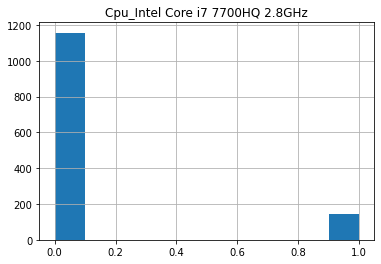

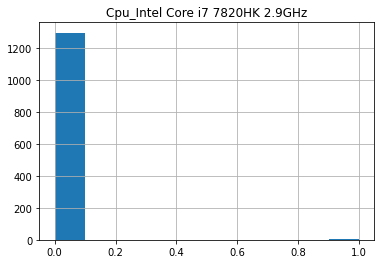

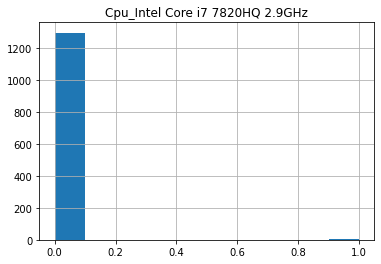

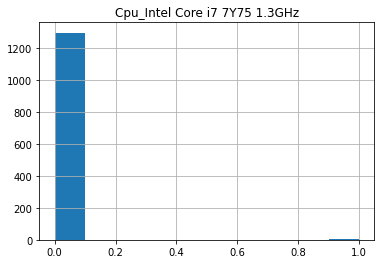

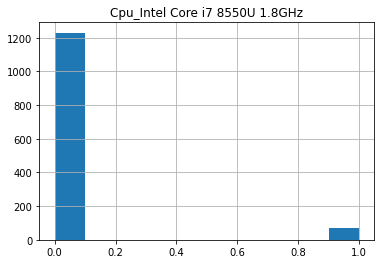

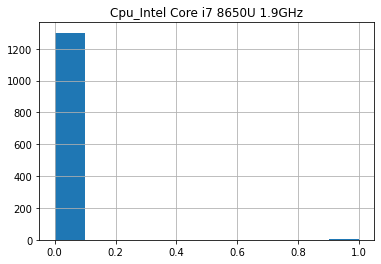

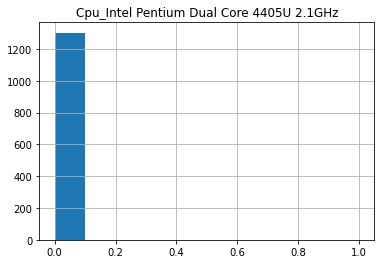

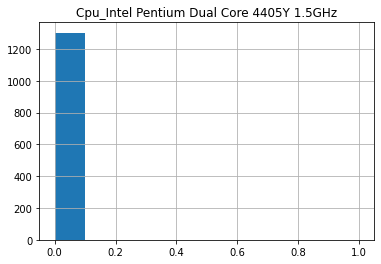

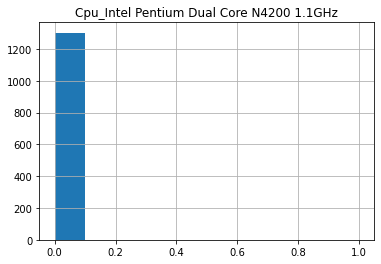

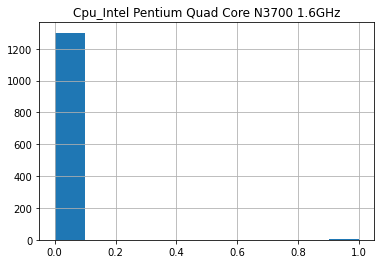

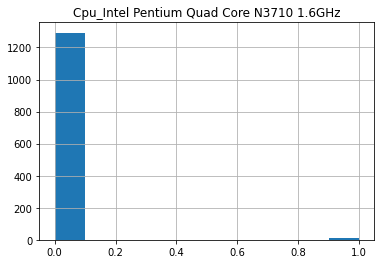

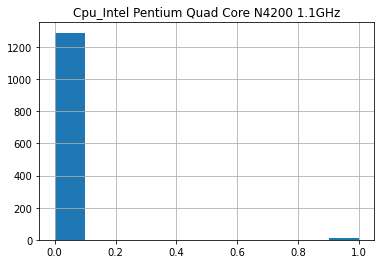

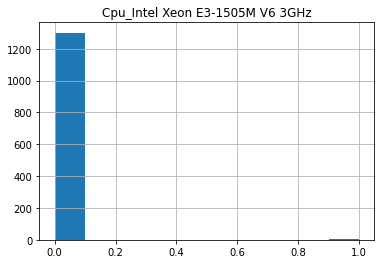

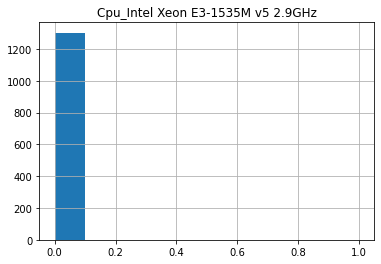

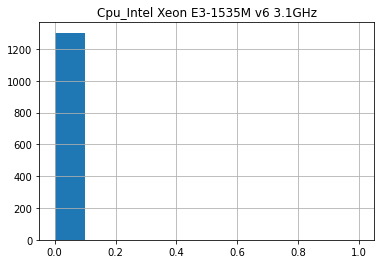

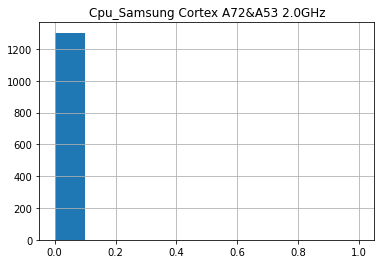

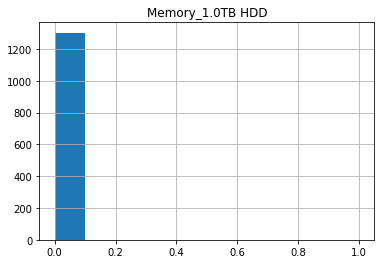

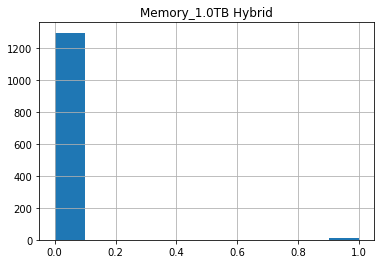

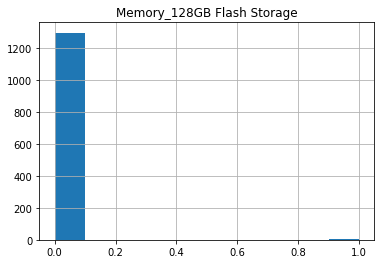

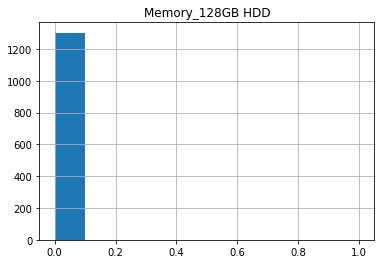

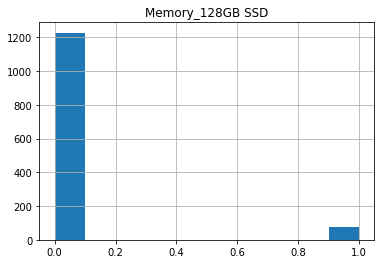

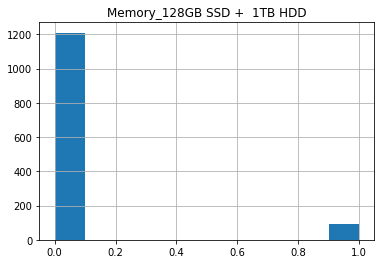

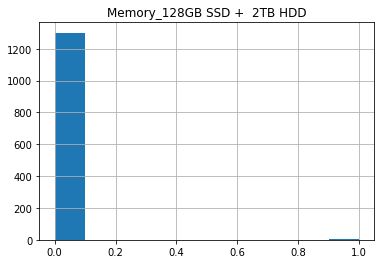

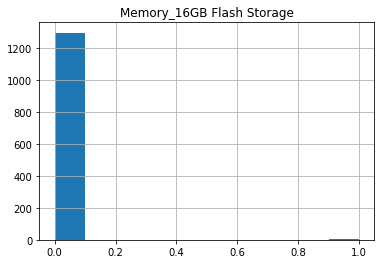

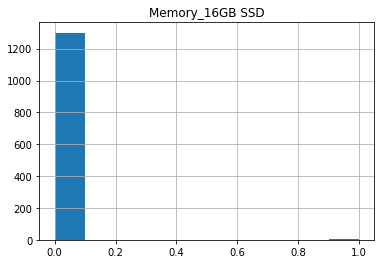

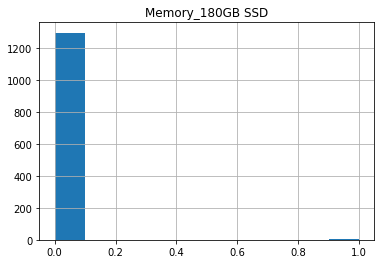

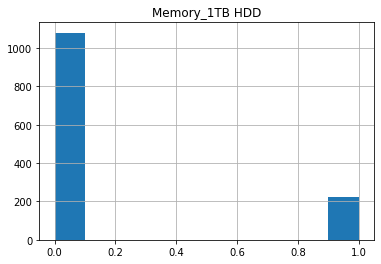

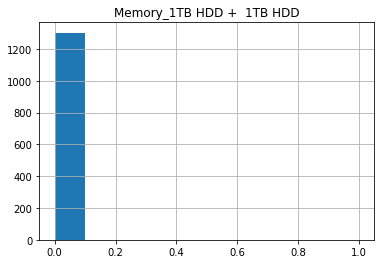

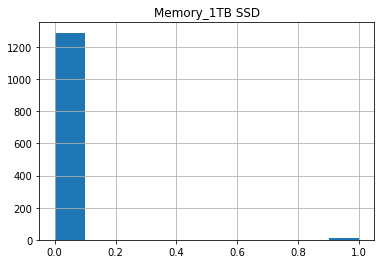

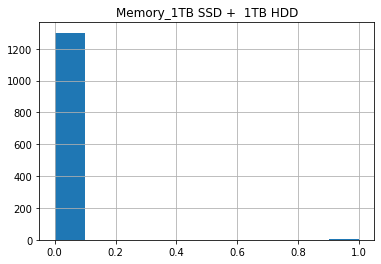

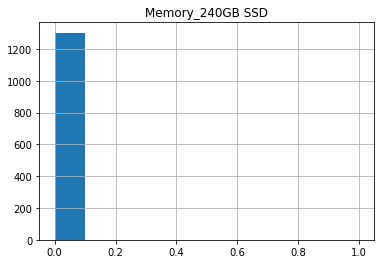

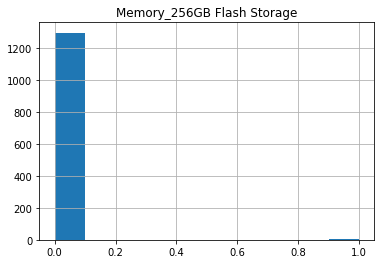

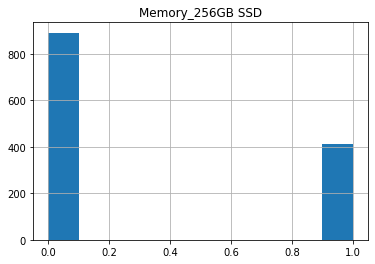

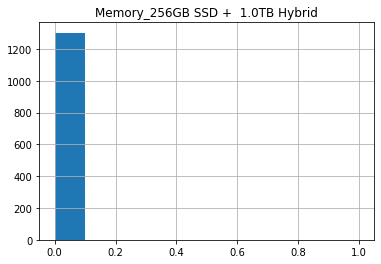

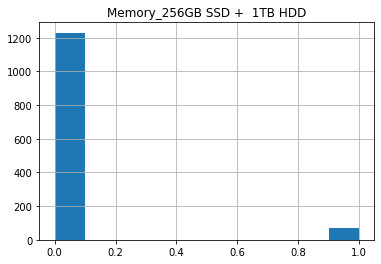

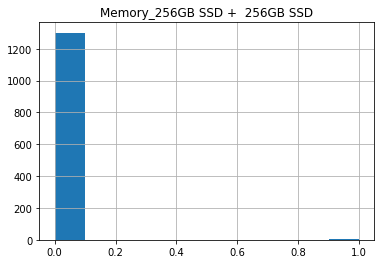

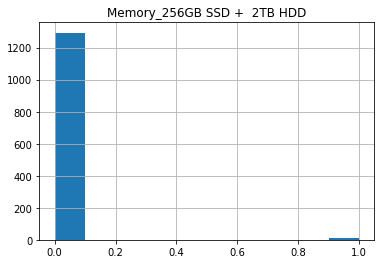

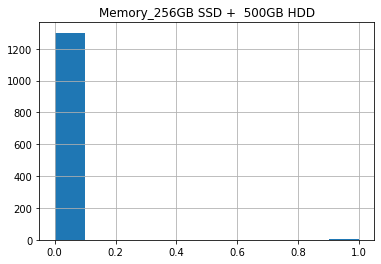

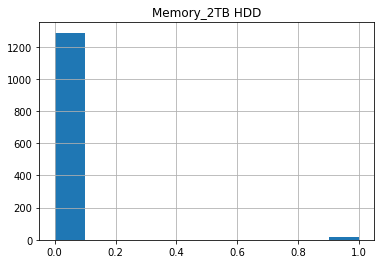

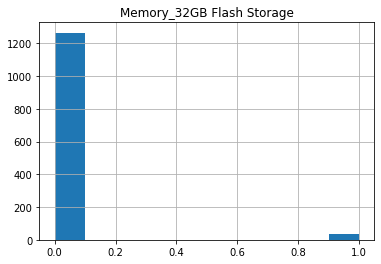

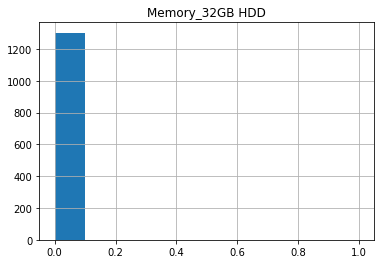

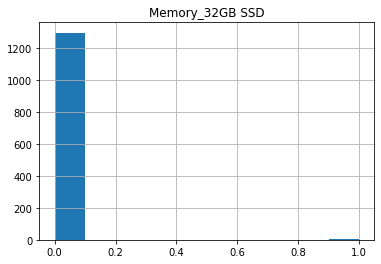

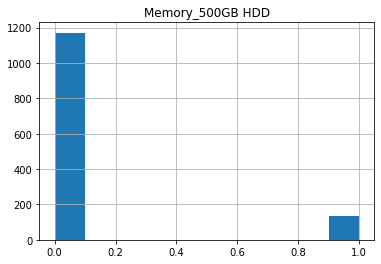

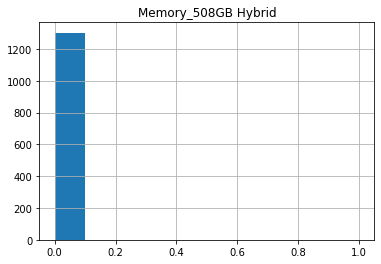

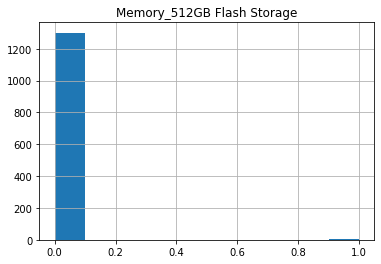

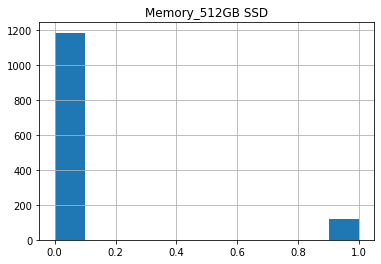

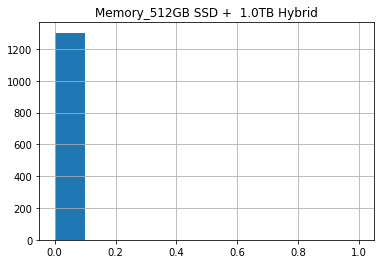

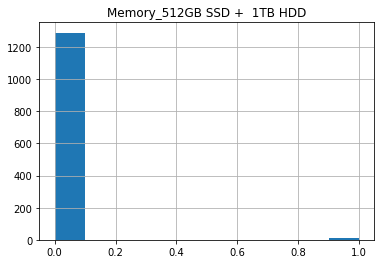

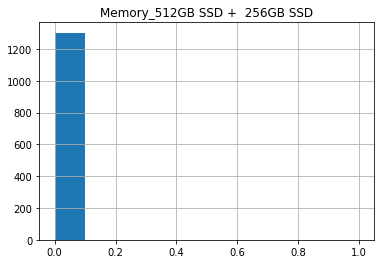

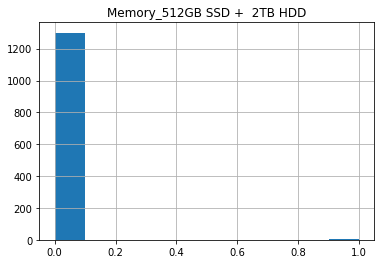

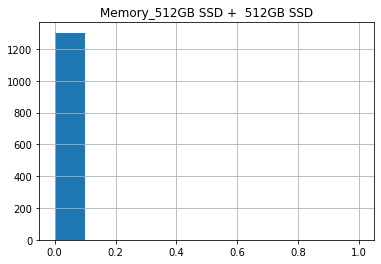

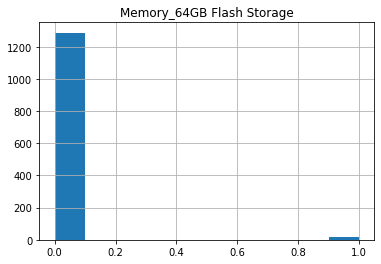

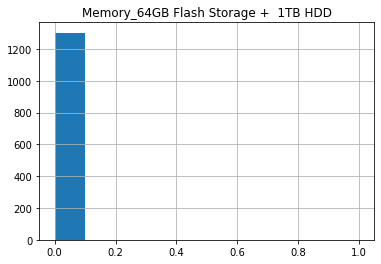

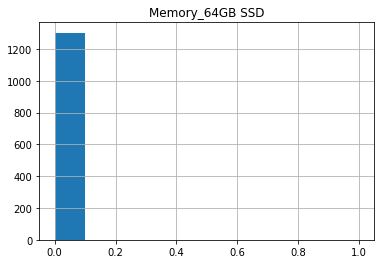

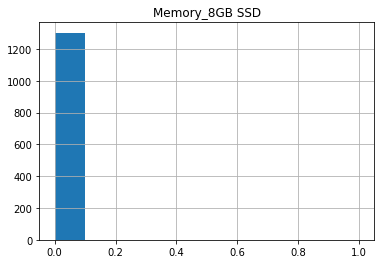

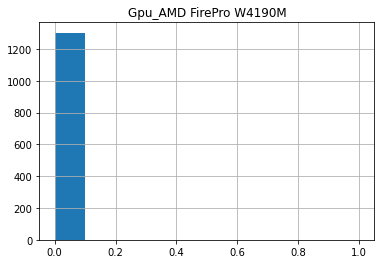

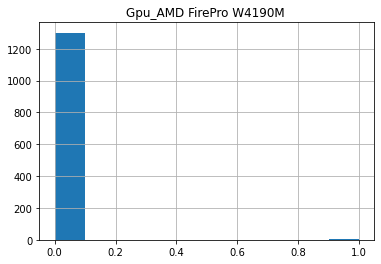

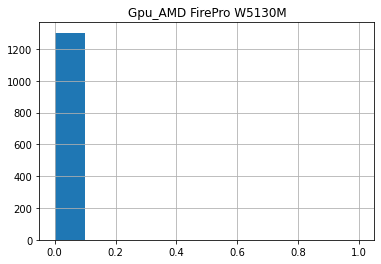

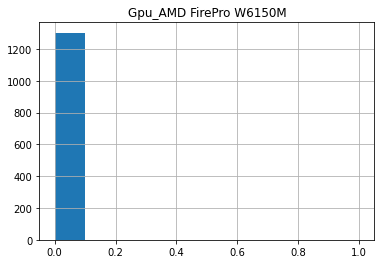

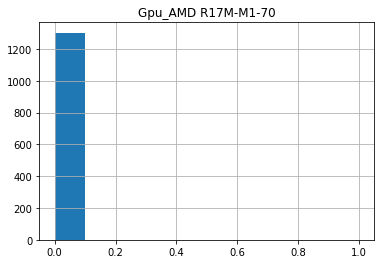

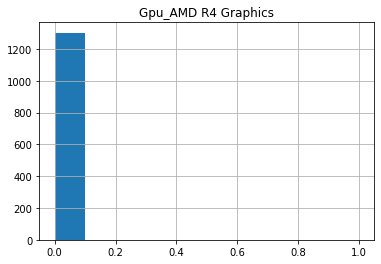

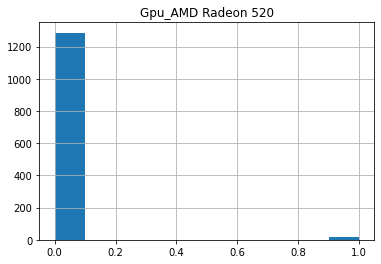

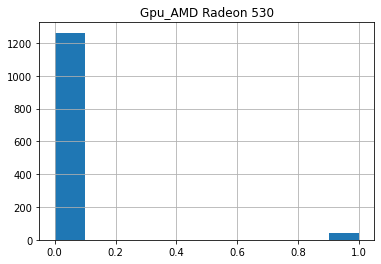

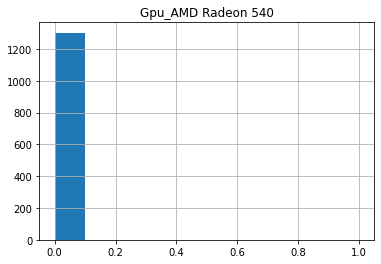

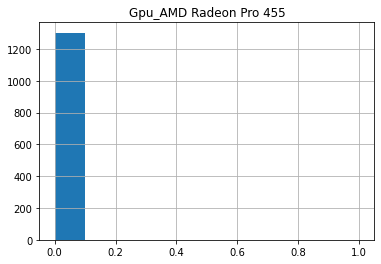

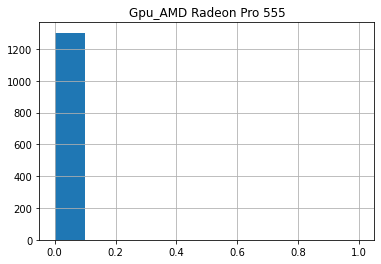

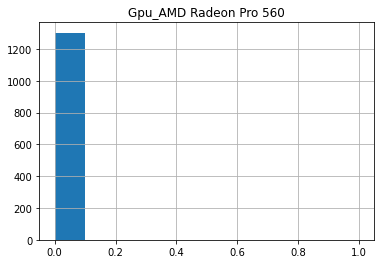

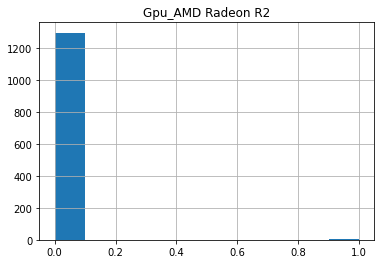

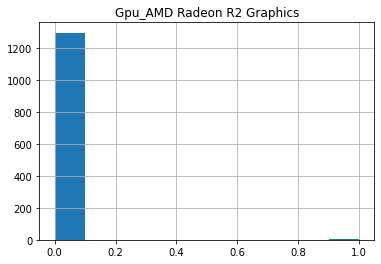

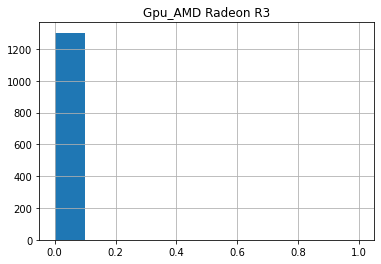

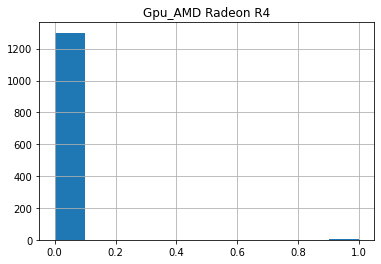

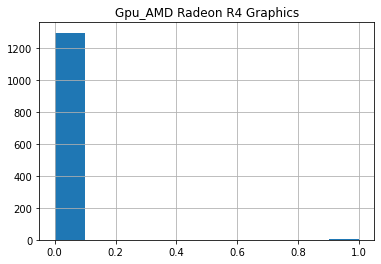

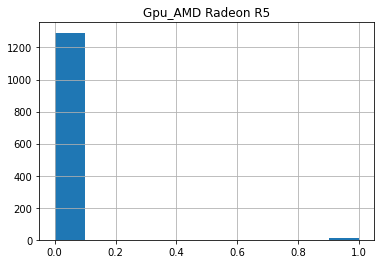

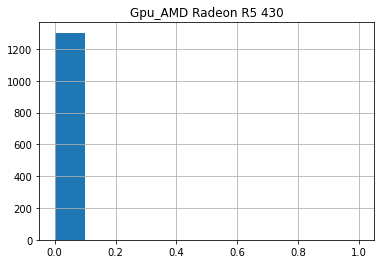

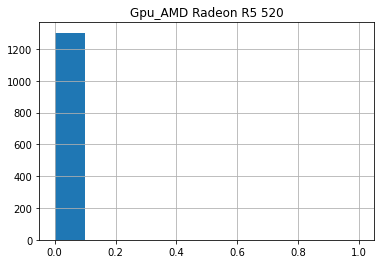

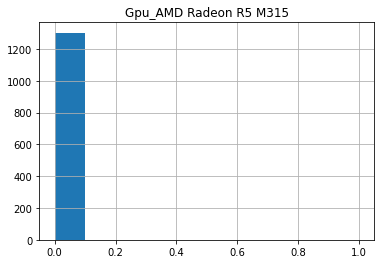

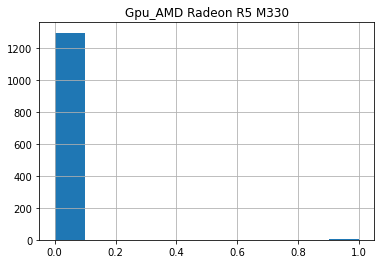

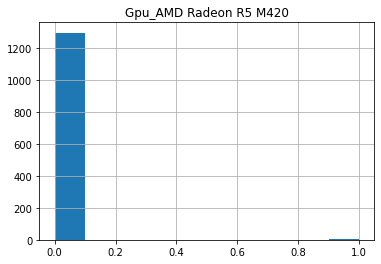

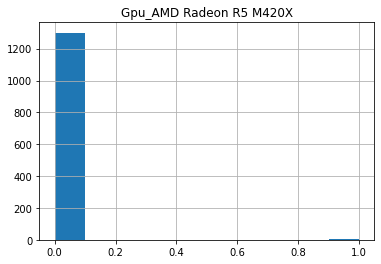

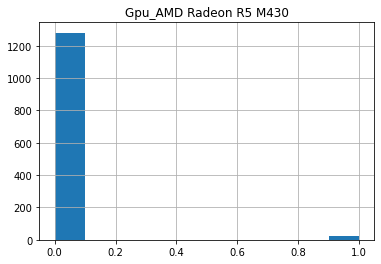

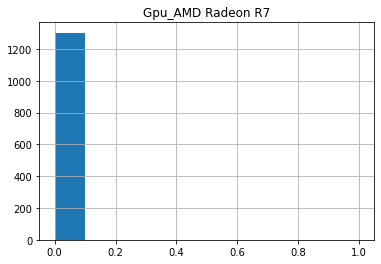

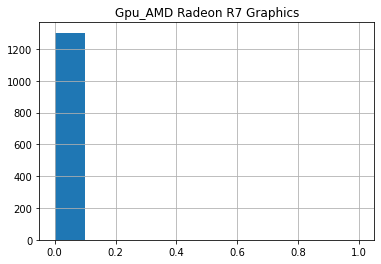

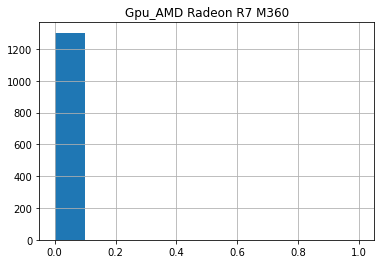

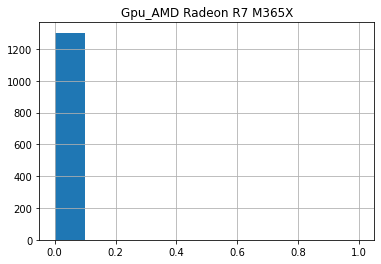

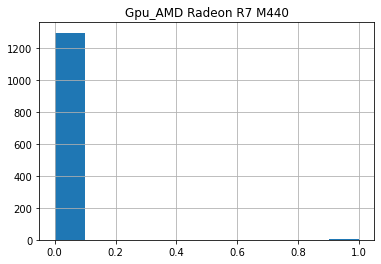

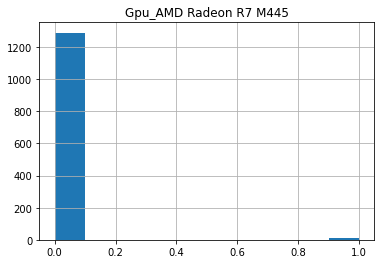

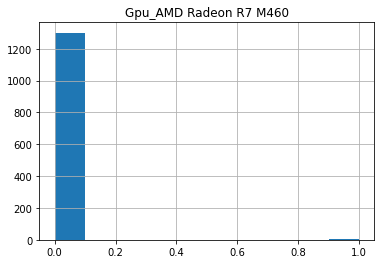

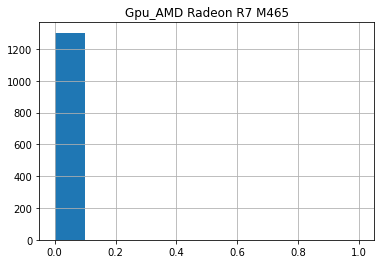

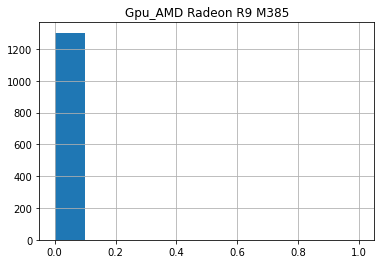

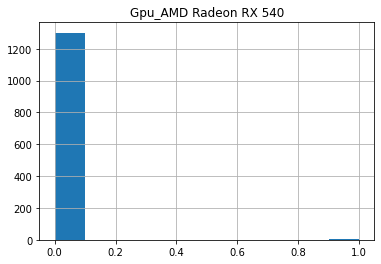

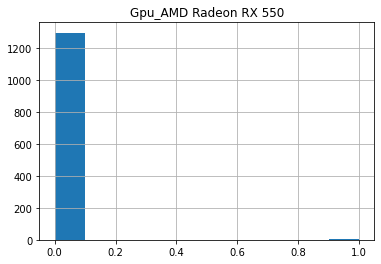

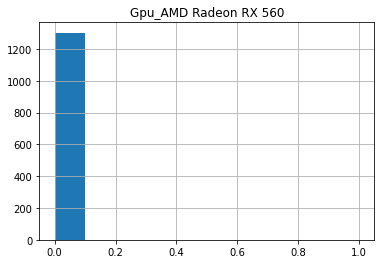

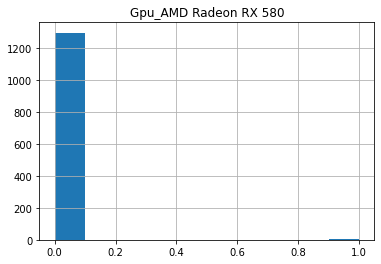

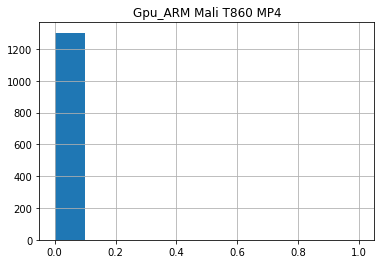

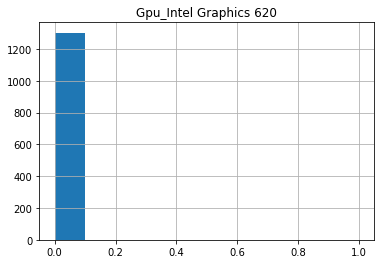

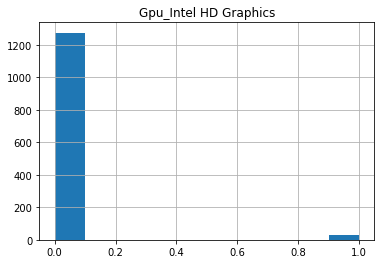

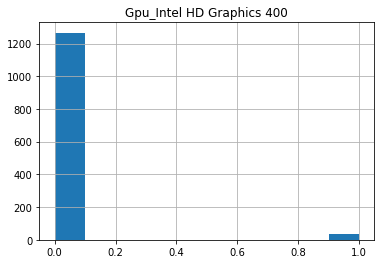

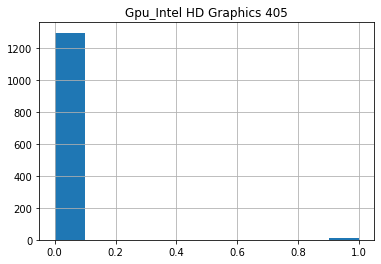

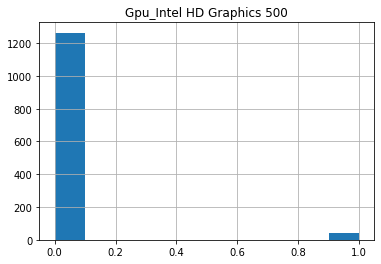

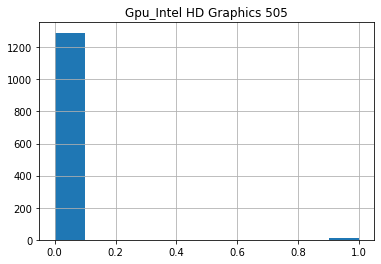

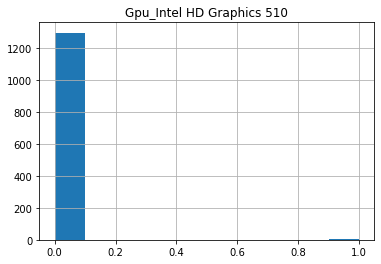

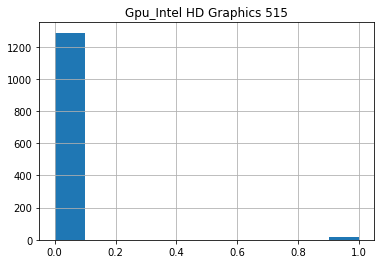

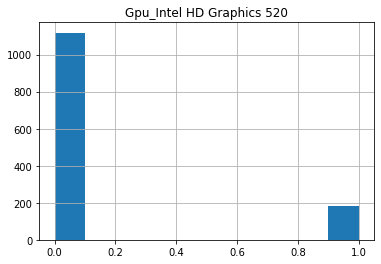

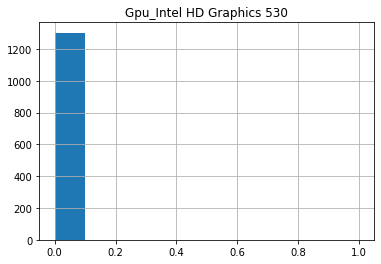

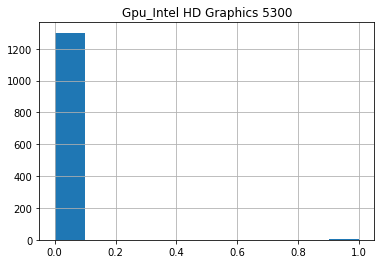

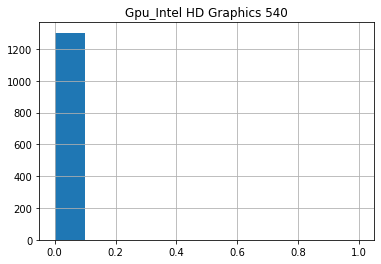

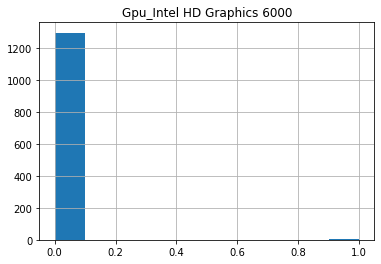

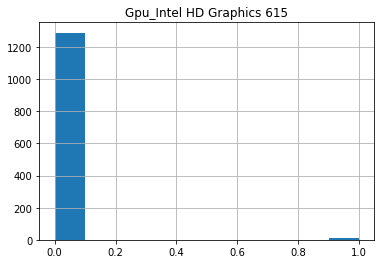

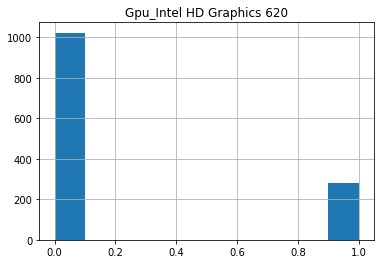

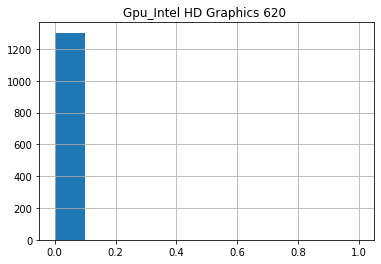

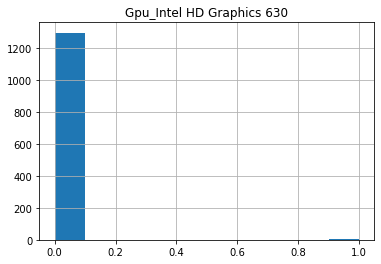

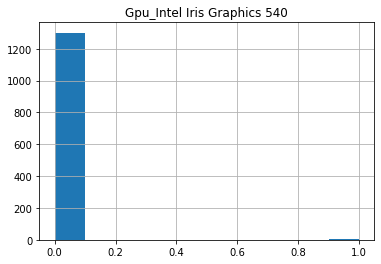

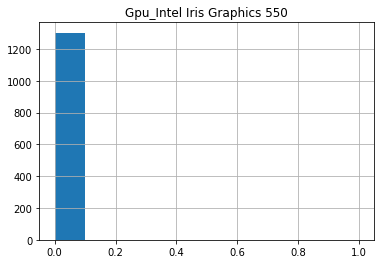

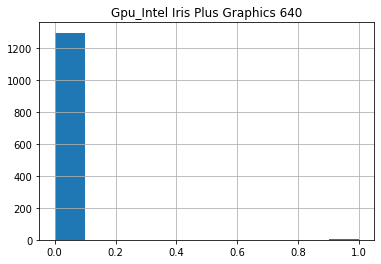

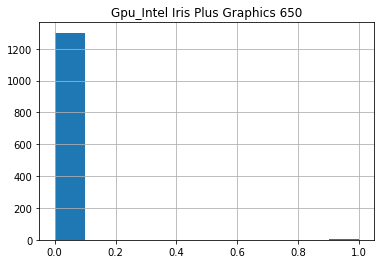

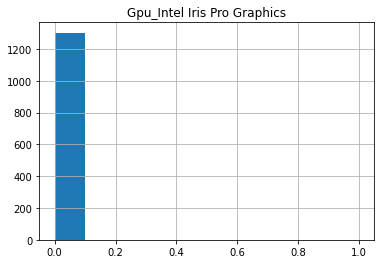

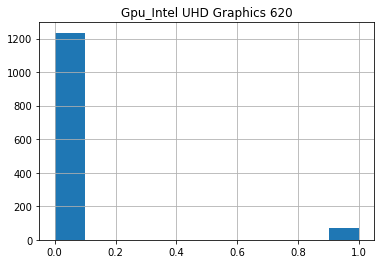

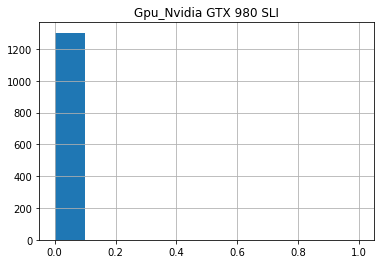

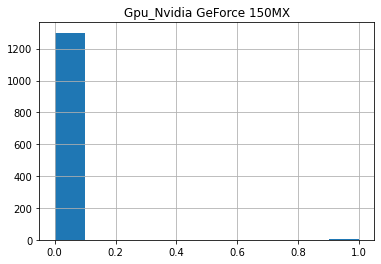

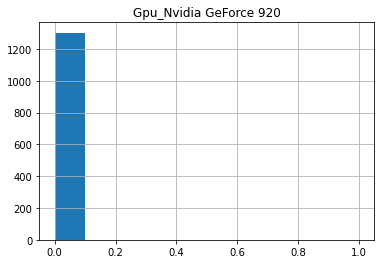

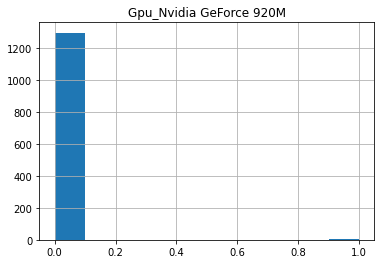

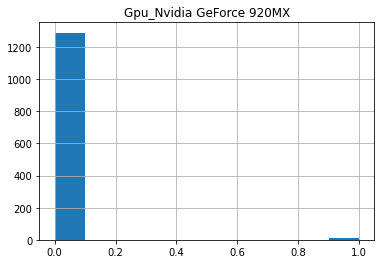

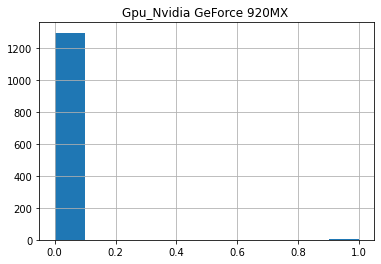

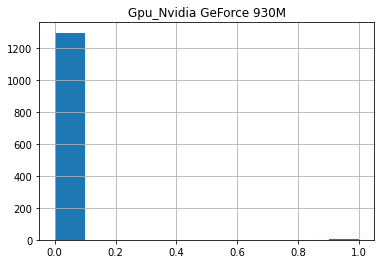

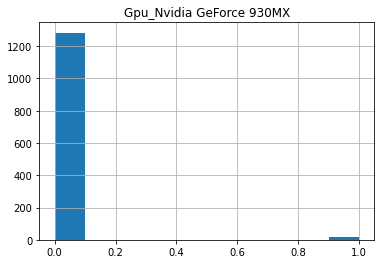

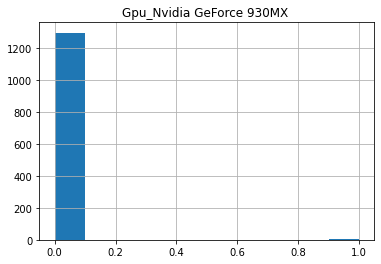

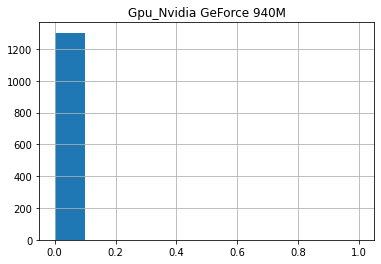

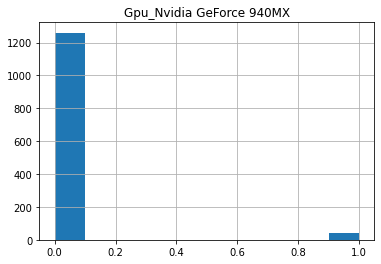

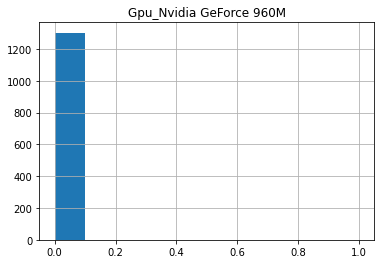

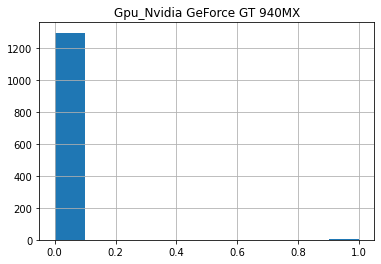

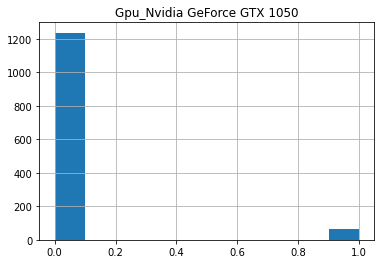

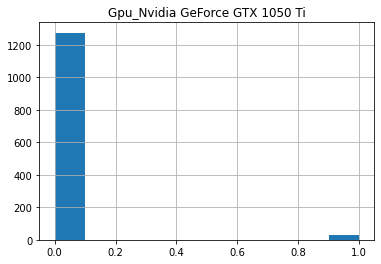

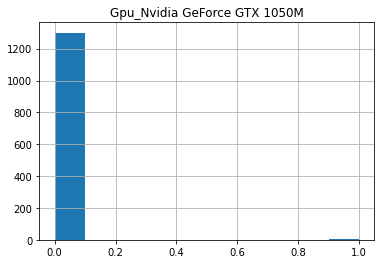

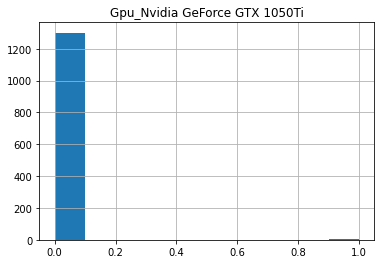

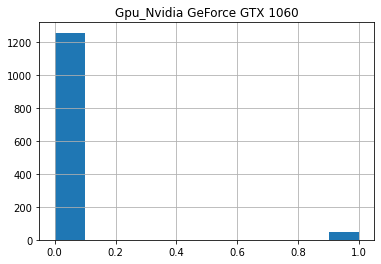

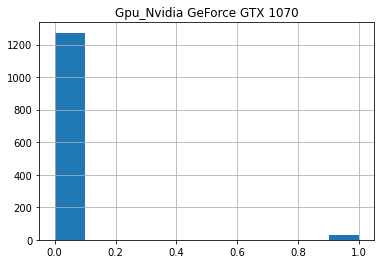

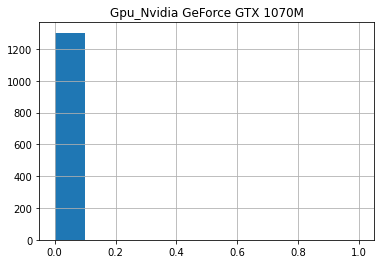

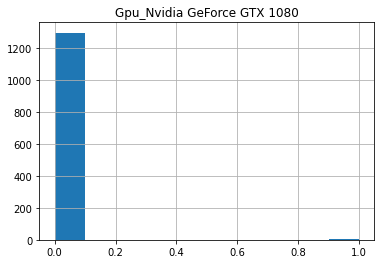

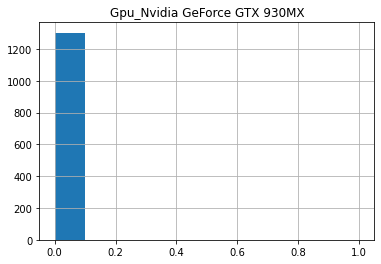

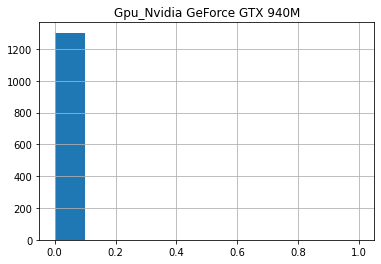

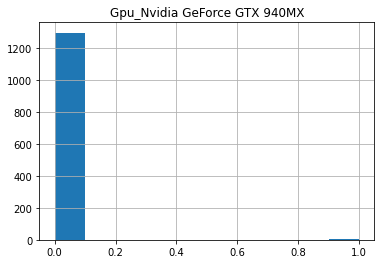

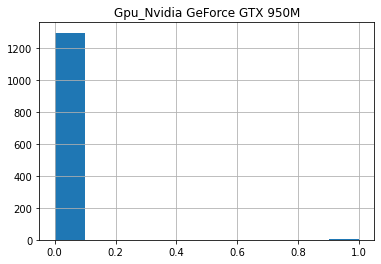

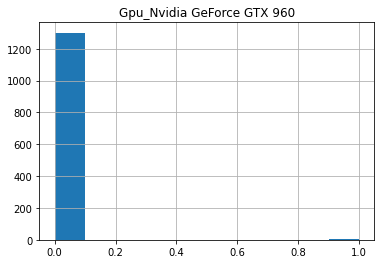

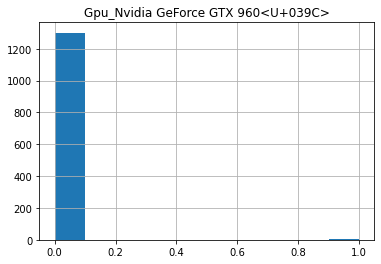

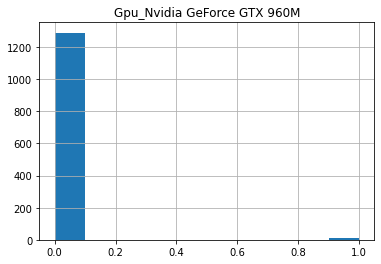

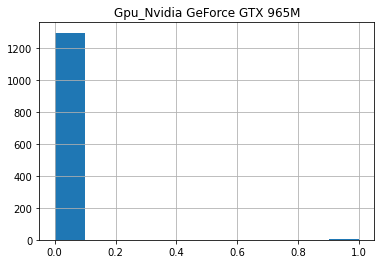

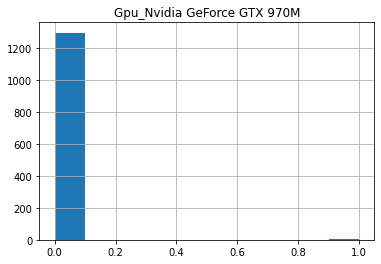

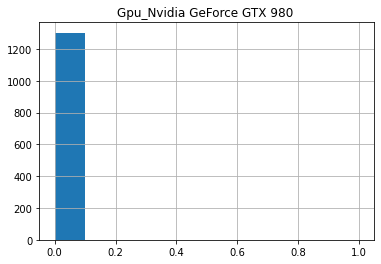

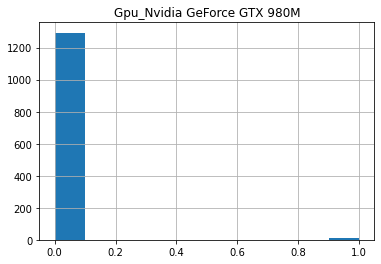

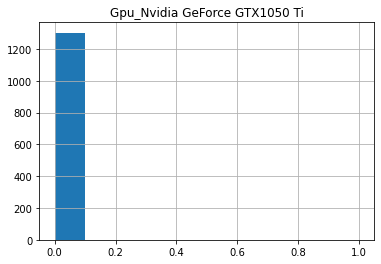

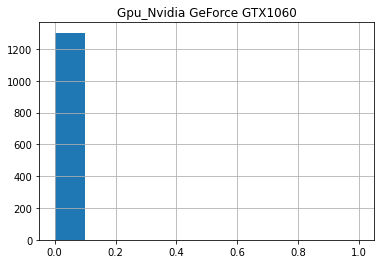

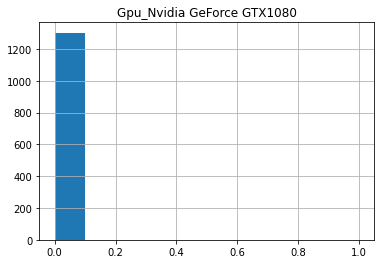

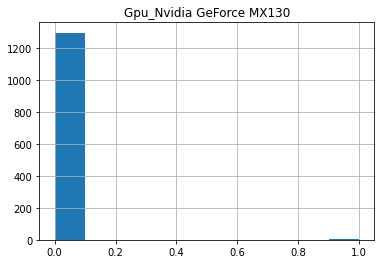

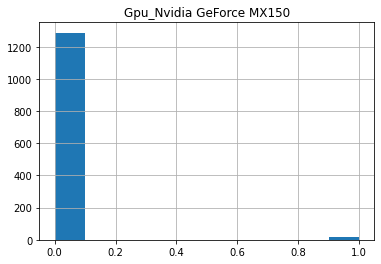

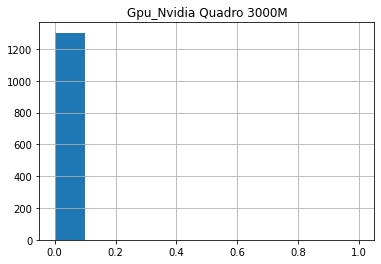

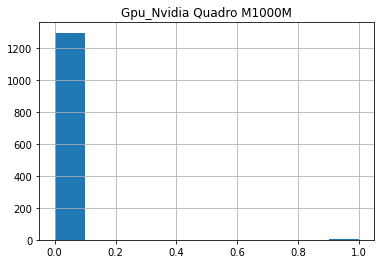

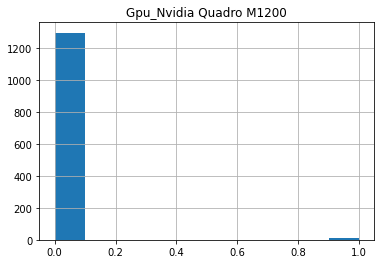

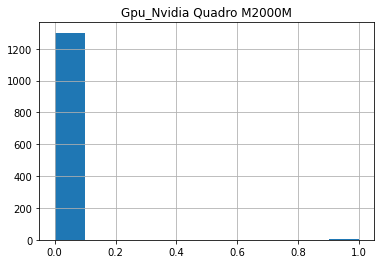

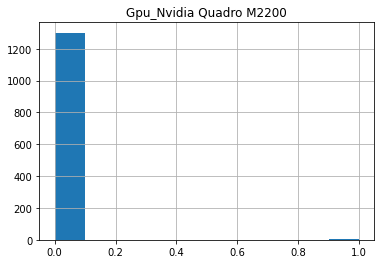

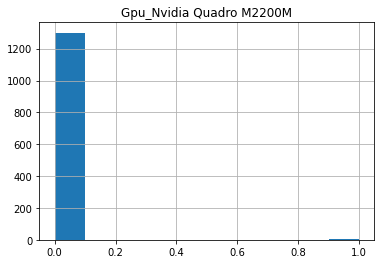

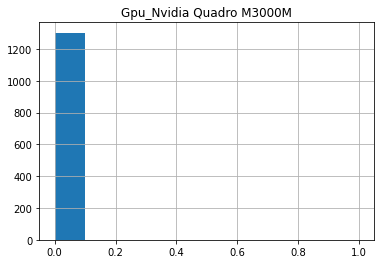

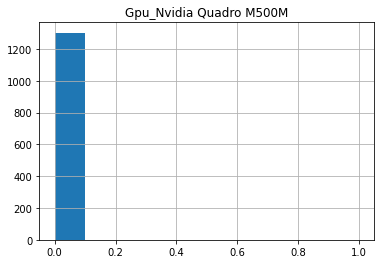

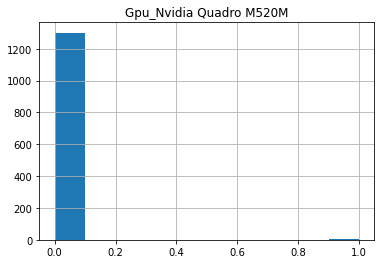

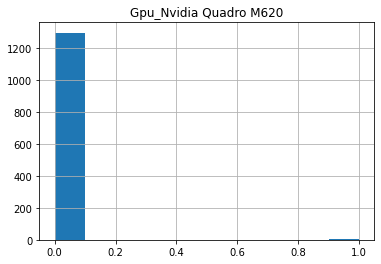

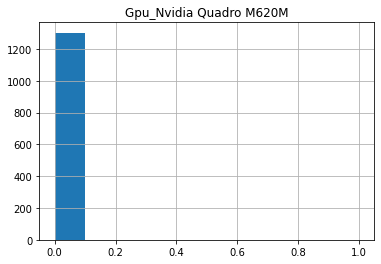

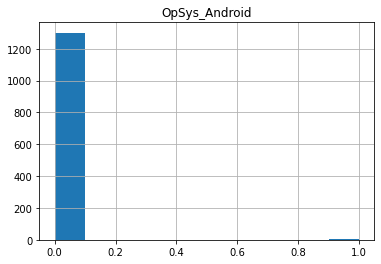

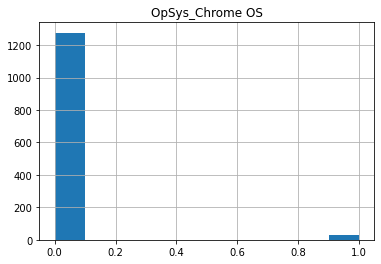

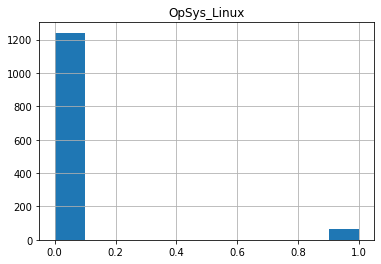

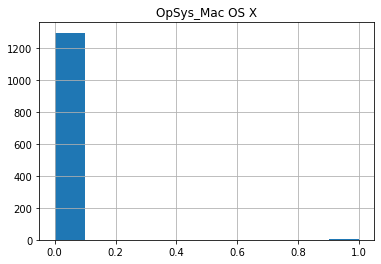

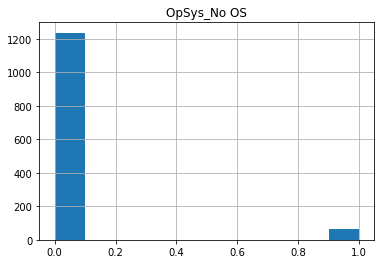

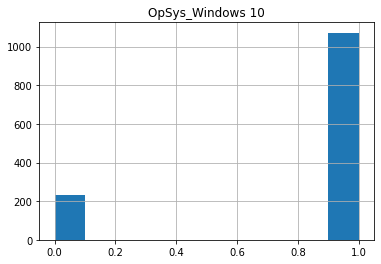

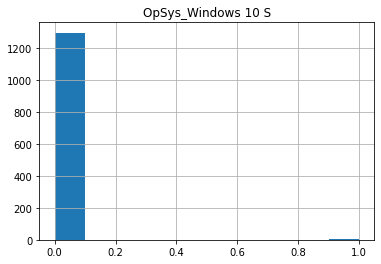

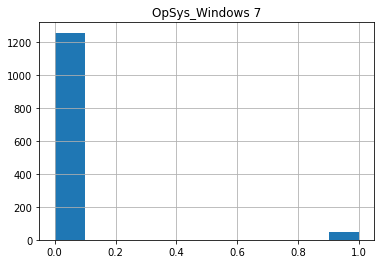

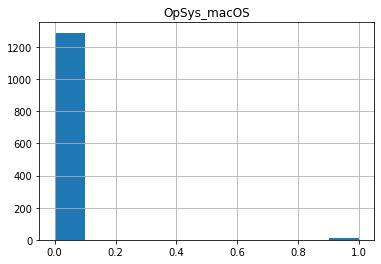

In [18]:
for col in data_final.columns:
  #print(col)
  data_final.hist(column=col)

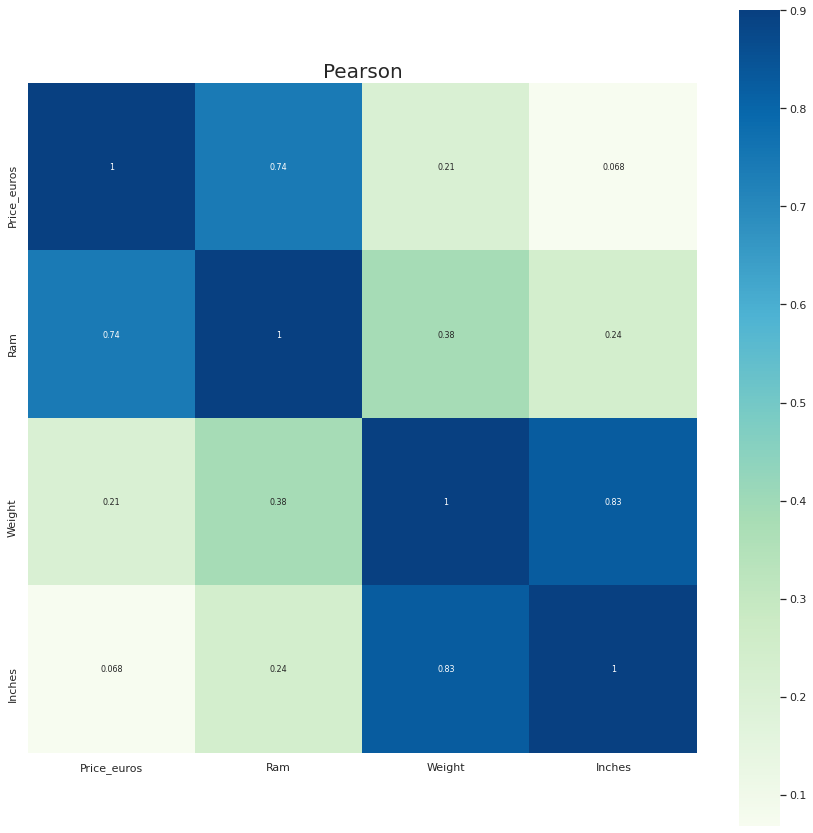

In [45]:
data_x  = data_final[['Price_euros','Ram','Weight','Inches']]
'''
Price_euros                           1303 non-null   float64
 2   Ram_12GB                              1303 non-null   uint8  
 3   Ram_16GB                              1303 non-null   uint8  
 4   Ram_24GB                              1303 non-null   uint8  
 5   Ram_2GB                               1303 non-null   uint8  
 6   Ram_32GB                              1303 non-null   uint8  
 7   Ram_4GB                               1303 non-null   uint8  
 8   Ram_64GB                              1303 non-null   uint8  
 9   Ram_6GB                               1303 non-null   uint8  
 10  Ram_8GB   
 '''

sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson",fontsize=20)
sns.heatmap(data_x.corr(),vmax=0.9,square=True,cmap="GnBu",linecolor='b',annot=True,annot_kws={'size':8})

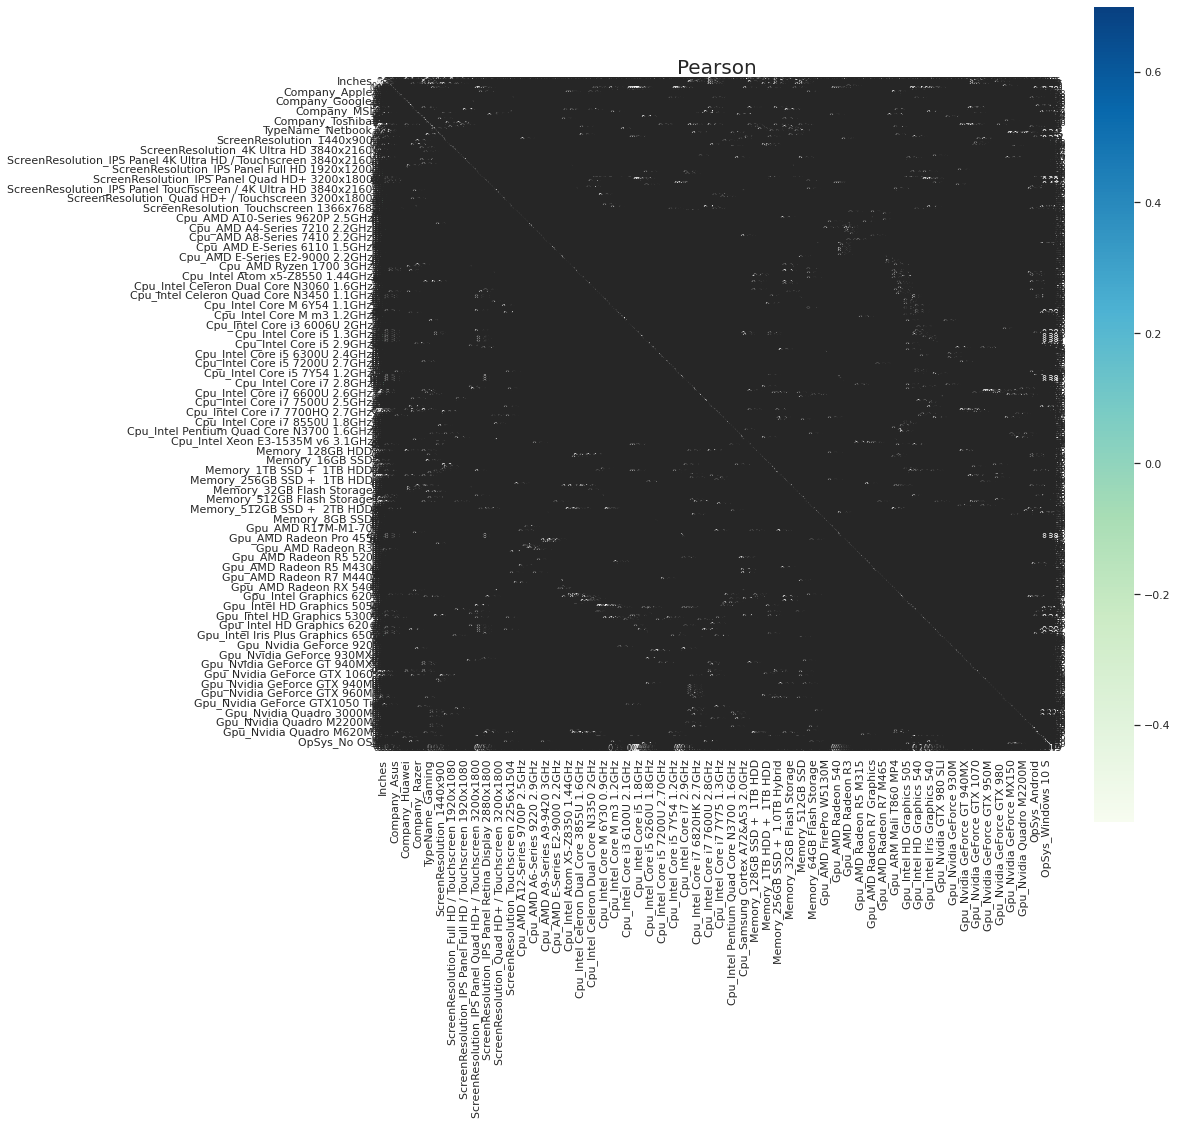

In [ ]:
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson",fontsize=20)
sns.heatmap(data_final.corr(),vmax=0.7,square=True,cmap="GnBu",linecolor='b',annot=True,annot_kws={'size':8})

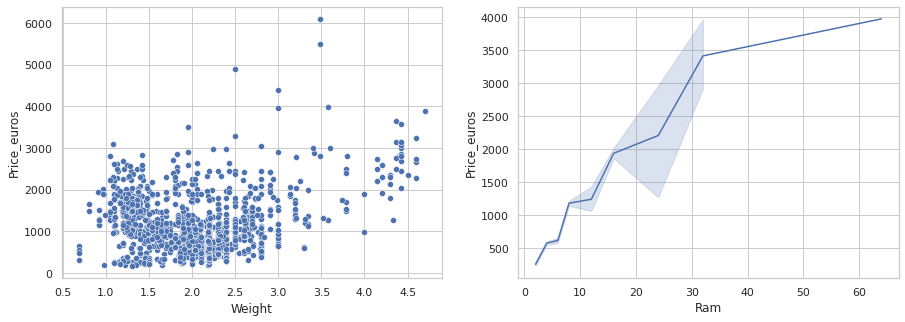

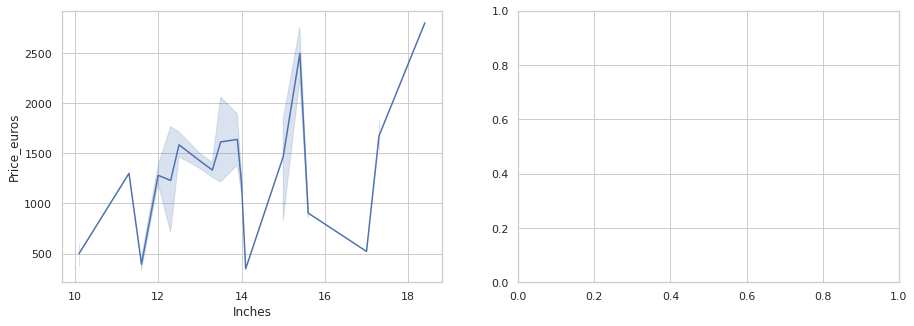

In [46]:
f,axes = plt.subplots(1,2,figsize=(15,5))
#sns.displot(data_final['Price_euros'],ax=axes[1])
#sns.lineplot(x='Inches',y='Price_euros',data=data_final,ax=axes[0])
#sns.lineplot(x='Ram',y='Price_euros',data=data_final,ax=axes[0])
sns.scatterplot(x='Weight',y='Price_euros',data=data_final,ax=axes[0])
sns.lineplot(x='Ram',y='Price_euros',data=data_final,ax=axes[1])
f,axes = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(x='Inches',y='Price_euros',data=data_final,ax=axes[0])
#sns.scatterplot(x='OpSys_macOS',y='OpSys_Linux',data=data_final,ax=axes[1])


In [47]:
X = data_final.drop(['Price_euros'],axis=1)
y = data_final['Price_euros']

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=20)

# Por la RAM ,el almacenamiento, y el precio debemos usar escalares

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)


In [48]:
X.values

array([[13.3 ,  8.  ,  1.37, ...,  0.  ,  0.  ,  1.  ],
       [13.3 ,  8.  ,  1.34, ...,  0.  ,  0.  ,  1.  ],
       [15.6 ,  8.  ,  1.86, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [14.  ,  2.  ,  1.5 , ...,  0.  ,  0.  ,  0.  ],
       [15.6 ,  6.  ,  2.19, ...,  0.  ,  0.  ,  0.  ],
       [15.6 ,  4.  ,  2.2 , ...,  0.  ,  0.  ,  0.  ]])

In [49]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: Price_euros, Length: 1303, dtype: float64

In [50]:
model = Sequential()

model.add(Dense(14,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(4,activation='relu'))
#model.add(Dense(1,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [51]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batch_size=250,epochs=200,verbose=0)

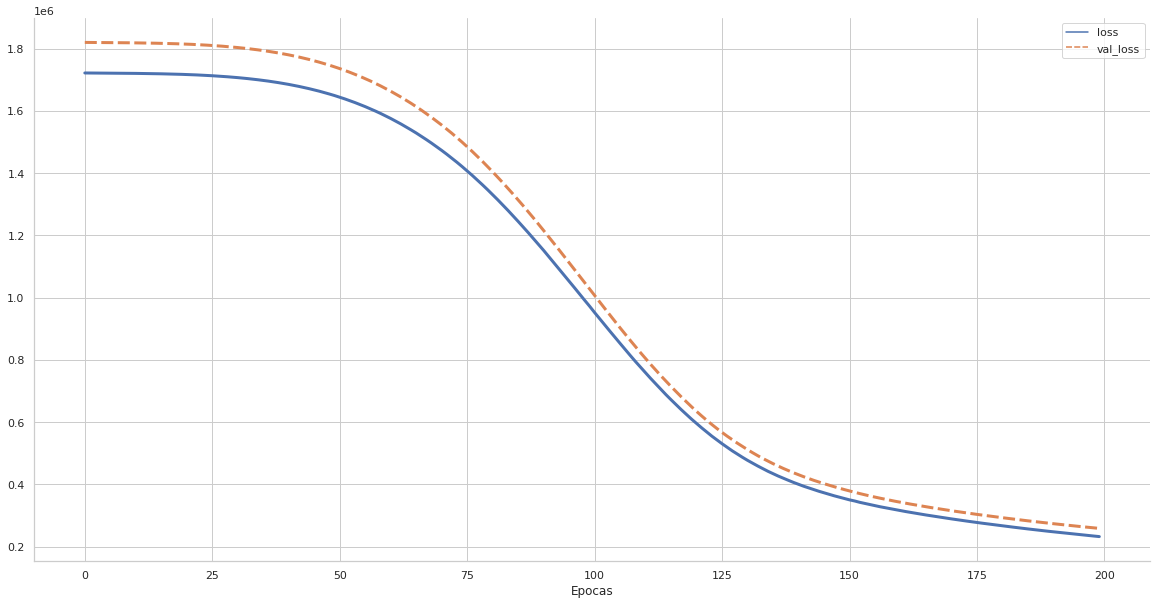

In [52]:
# Obtengo la perdida y la grafico
# Perdida validacion y perdida del error
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(20,10))
sns.lineplot(data=loss,lw=3)
plt.xlabel('Epocas')
sns.despine()



In [95]:
prediccion = model.predict(X_test)
# Obtengo la prediccion basado en el error medio
print(mean_absolute_error(y_test,prediccion))

359.46645755699524


In [55]:
inv_test = data_final.drop('Price_euros',axis=1).iloc[0]
print(inv_test)
print('Real price $',data_final.iloc[0]['Price_euros'])


# Precedir este individuo
#print('Pred $',model.predict(scaler.transform(inv_test.values.reshape(-1,344)))[0,0])
print('Pred $',model.predict(scaler.transform(inv_test.values.reshape(1,344)))[0,0])

Inches                13.30
Ram                    8.00
Weight                 1.37
Company_Acer           0.00
Company_Apple          1.00
                      ...  
OpSys_No OS            0.00
OpSys_Windows 10       0.00
OpSys_Windows 10 S     0.00
OpSys_Windows 7        0.00
OpSys_macOS            1.00
Name: 0, Length: 344, dtype: float64
Real price $ 1339.69
Pred $ 1281.1625


In [56]:
data_final.shape



(1303, 345)

In [ ]:
#test = inv_test.values

#test = inv_test.values.reshape(1,344)
#test.shape
#test 

**SEGUNDO MODELO: RANDOM FOREST REGRESSOR**

In [58]:
#Segundo modelo RandomForestRegressor
# random forest
modelo_forest = RandomForestRegressor(n_estimators=10,random_state=0)
modelo_forest.fit(X_train,y_train)
prediccion_inv = modelo_forest.predict(scaler.transform(inv_test.values.reshape(1,344)))
prediccion_f = modelo_forest.predict(X_test)



In [59]:
X_test.shape

(391, 344)

In [60]:
#print(mean_absolute_error(y_test,prediccion_f))
print('Mean Absolute Error:', mean_absolute_error(y_test, prediccion_f)) 

Mean Absolute Error: 337.1284459505541


In [61]:
print('Real price $',data_final.iloc[0]['Price_euros'])
# Precedir este individuo
#print('Pred $',model.predict(scaler.transform(inv_test.values.reshape(-1,344)))[0,0])
print('Pred random forest $',prediccion_inv[0])

Real price $ 1339.69
Pred random forest $ 1140.8


**TERCER MODELO: SUPPORT VECTOR REGRESSION**

In [114]:
data_final.head()


,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,ScreenResolution_1366x768,ScreenResolution_1440x900,ScreenResolution_1600x900,ScreenResolution_1920x1080,ScreenResolution_2560x1440,ScreenResolution_4K Ultra HD / Touchscreen 3840x2160,ScreenResolution_4K Ultra HD 3840x2160,ScreenResolution_Full HD / Touchscreen 1920x1080,ScreenResolution_Full HD 1920x1080,ScreenResolution_IPS Panel 1366x768,ScreenResolution_IPS Panel 2560x1440,...,Gpu_Nvidia GeForce GTX 1060,Gpu_Nvidia GeForce GTX 1070,Gpu_Nvidia GeForce GTX 1070M,Gpu_Nvidia GeForce GTX 1080,Gpu_Nvidia GeForce GTX 930MX,Gpu_Nvidia GeForce GTX 940M,Gpu_Nvidia GeForce GTX 940MX,Gpu_Nvidia GeForce GTX 950M,Gpu_Nvidia GeForce GTX 960,Gpu_Nvidia GeForce GTX 960<U+039C>,Gpu_Nvidia GeForce GTX 960M,Gpu_Nvidia GeForce GTX 965M,Gpu_Nvidia GeForce GTX 970M,Gpu_Nvidia GeForce GTX 980,Gpu_Nvidia GeForce GTX 980M,Gpu_Nvidia GeForce GTX1050 Ti,Gpu_Nvidia GeForce GTX1060,Gpu_Nvidia GeForce GTX1080,Gpu_Nvidia GeForce MX130,Gpu_Nvidia GeForce MX150,Gpu_Nvidia Quadro 3000M,Gpu_Nvidia Quadro M1000M,Gpu_Nvidia Quadro M1200,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M2200,Gpu_Nvidia Quadro M2200M,Gpu_Nvidia Quadro M3000M,Gpu_Nvidia Quadro M500M,Gpu_Nvidia Quadro M520M,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8,1.37,1339.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,13.3,8,1.34,898.94,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,15.6,8,1.86,575.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,15.4,16,1.83,2537.45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,13.3,8,1.37,1803.60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [115]:
#X = data_final.iloc[:, 0:4].values
#y = data_final.iloc[:, 2].values
#X = data_final
X = data_final.drop(['Price_euros'],axis=1).values
X.shape

(1303, 344)

In [116]:
X

array([[13.3 ,  8.  ,  1.37, ...,  0.  ,  0.  ,  1.  ],
       [13.3 ,  8.  ,  1.34, ...,  0.  ,  0.  ,  1.  ],
       [15.6 ,  8.  ,  1.86, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [14.  ,  2.  ,  1.5 , ...,  0.  ,  0.  ,  0.  ],
       [15.6 ,  6.  ,  2.19, ...,  0.  ,  0.  ,  0.  ],
       [15.6 ,  4.  ,  2.2 , ...,  0.  ,  0.  ,  0.  ]])

In [117]:
Y = data_final['Price_euros'].values
Y = data_final.iloc[:,3:4].values
#Y
#Y = data_final.iloc[:,2].values
Y 


array([[1339.69],
       [ 898.94],
       [ 575.  ],
       ...,
       [ 229.  ],
       [ 764.  ],
       [ 369.  ]])

In [118]:
y.shape

(1303, 1)

In [119]:
# Tercer modelo  SVR
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(Y)

In [120]:
Y.shape

(1303, 1)

In [121]:
y.shape

(1303, 1)

In [122]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [123]:
X

array([[-1.20440688, -0.07519506, -1.00528323, ..., -0.07859775,
        -0.1891324 ,  9.96146421],
       [-1.20440688, -0.07519506, -1.05038114, ..., -0.07859775,
        -0.1891324 ,  9.96146421],
       [ 0.40877166, -0.07519506, -0.26868391, ..., -0.07859775,
        -0.1891324 , -0.10038685],
       ...,
       [-0.7134395 , -1.25566695, -0.80985892, ..., -0.07859775,
        -0.1891324 , -0.10038685],
       [ 0.40877166, -0.46868569,  0.22739318, ..., -0.07859775,
        -0.1891324 , -0.10038685],
       [ 0.40877166, -0.86217632,  0.24242582, ..., -0.07859775,
        -0.1891324 , -0.10038685]])

In [129]:
regressor.fit(X,y)
Y_pred=regressor.predict(X)
Y_pred = sc_y.inverse_transform(Y_pred)
y_pred = regressor.predict([X[0]])
y_pred = sc_y.inverse_transform(y_pred) 
y_pred
mse = mean_absolute_error(Y,Y_pred)
print('MSE',mse)
print('Real price $',data_final.iloc[0]['Price_euros'])
# Precedir este individuo
#print('Pred $',model.predict(scaler.transform(inv_test.values.reshape(-1,344)))[0,0])
print('Pred support vector regression $',y_pred[0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE 141.29551880724563
Real price $ 1339.69
Pred support vector regression $ 1409.5381355041482
